<a href="https://colab.research.google.com/github/alorozco53/Assignment2NS/blob/master/Assign2NSAlbertOrozcoCamacho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2
**Network Science**

_Prof Reihaneh Rabbany_

Author: Albert M Orozco Camacho


# Dependencies

In [1]:
!pip install --upgrade python-igraph

     |████████████████████████████████| 378kB 2.8MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.7.1.post6-cp36-cp36m-linux_x86_64.whl size=2220231 sha256=aa16d277c4c38b5d8a41ef2ac904daf707887816adcdee0a67d05adcdc36b317
  Stored in directory: /root/.cache/pip/wheels/41/d6/02/34eebae97e25f5b87d60f4c0687e00523e3f244fa41bc3f4a7
Successfully built python-igraph


In [2]:
!pip install --upgrade networkx

Requirement already up-to-date: networkx in /usr/local/lib/python3.6/dist-packages (2.3)


# Data Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!wget http://www.reirab.com/Teaching/NS19/real-classic.zip -O /content/drive/My\ Drive/courses/network-science/assignments/a2/data/real-classic.zip

--2019-10-01 18:23:53--  http://www.reirab.com/Teaching/NS19/real-classic.zip
Resolving www.reirab.com (www.reirab.com)... 74.125.132.128, 2607:f8b0:4001:c00::80
Connecting to www.reirab.com (www.reirab.com)|74.125.132.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104565 (102K) [application/zip]
Saving to: ‘/content/drive/My Drive/courses/network-science/assignments/a2/data/real-classic.zip’

/content/drive/My D 100%[===================>] 102.11K  --.-KB/s    in 0.002s  

2019-10-01 18:23:54 (60.1 MB/s) - ‘/content/drive/My Drive/courses/network-science/assignments/a2/data/real-classic.zip’ saved [104565/104565]



In [0]:
!cd /content/drive/My\ Drive/courses/network-science/assignments/a2/data/ && unzip real-classic.zip && mv real-classic set1/

Archive:  real-classic.zip
replace real-classic/strike.gml? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: real-classic/strike.gml  
  inflating: real-classic/polblogs.gml  
  inflating: real-classic/polblogs.txt  
  inflating: real-classic/football.gml  
  inflating: real-classic/football.txt  
  inflating: real-classic/karate.gml  
  inflating: real-classic/karate.txt  
  inflating: real-classic/polbooks.gml  
  inflating: real-classic/polbooks.txt  


In [0]:
!git clone https://github.com/tkipf/gcn.git /content/drive/My\ Drive/courses/network-science/assignments/a2/data/set2/

Cloning into '/content/drive/My Drive/courses/network-science/assignments/a2/data/set2'...
remote: Enumerating objects: 139, done.
remote: Total 139 (delta 0), reused 0 (delta 0), pack-reused 139
Receiving objects: 100% (139/139), 5.08 MiB | 3.48 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [0]:
!cp /content/drive/My\ Drive/courses/network-science/assignments/a2/data/set2/gcn/utils.py .

# Community Detection Algorithms

In [0]:
import networkx as nx
import community
import igraph as ig
import matplotlib.pyplot as plt

from community import modularity
from networkx.algorithms.community import greedy_modularity_communities

**_Modularity-based community detection_**

Clauset-Newman-Moore greedy maximization

https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html#networkx.algorithms.community.modularity_max.greedy_modularity_communities

In [0]:
def modularity_det(graph):
    return greedy_modularity_communities(graph)

**_Louvain best partition_**

Maximizes Q modularity

https://python-louvain.readthedocs.io/en/latest/api.html#community.best_partition

In [0]:
def louvain_best_partition(graph, draw=False):
    partition = community.best_partition(graph)

    if draw:
        size = float(len(set(partition.values())))
        pos = nx.spring_layout(graph)
        count = 0
        for com in set(partition.values()):
            count += 1
            list_nodes = [nodes for nodes in partition.keys()
                          if partition[nodes] == com]
            nx.draw_networkx_nodes(graph, pos, list_nodes,
                                   node_size = 20,
                                   node_color = str(count / size))
            nx.draw_networkx_edges(graph, pos, alpha=0.5)
        plt.show()

    return partition

**_Walktrap algorithm_**

The basic idea of the algorithm is that short random walks tend to stay in the same community.

https://igraph.org/python/doc/igraph.Graph-class.html#community_walktrap

In [0]:
def walktrap_det(graph):
    dendrogram = graph.community_walktrap()
    clusters = dendrogram.as_clustering()
    return clusters.subgraphs()

_**Infomap**_

Finds the community structure of the network according to the Infomap method of Martin Rosvall and Carl T. Bergstrom

https://igraph.org/python/doc/igraph.Graph-class.html#community_infomap

In [0]:
def infomap_det(graph):
    clusters = graph.community_infomap()
    return clusters.subgraphs()

_**Community Leading Eigenvector Algorithm**_

Newman's leading eigenvector method for detecting community structure. This is the proper implementation of the recursive, divisive algorithm: each split is done by maximizing the modularity regarding the original network.

https://igraph.org/python/doc/igraph.Graph-class.html#community_leading_eigenvector

In [0]:
def comm_lead_eigenvec_det(graph):
    clusters = graph.community_leading_eigenvector()
    return clusters.subgraphs()

- Wrapper to compute NMI and ARI measurements between two communities

In [0]:
def measure(y_pred, y_true):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    nmi = normalized_mutual_info_score(y_true, y_pred)
    ari = adjusted_rand_score(y_true, y_pred)
    return nmi, ari

- Wrapper to evaluate using various metrics

In [0]:
def evaluate(graph, igraph,
             save_prefix,
             ytrue=None,
             iter_algo_reps=10):
    results = pd.DataFrame(
        {'algorithm': [],
         'NMI': [],
         'ARI': [],
         'modularity': []}
    )

    info = graph.nodes(data=True)

    # Modularity
    communities = modularity_det(graph)
    y_pred = []
    if ytrue is None:
        y_true = []
    else:
        y_true = ytrue
    for i, comm in enumerate(communities):
        for comm_member in sorted(comm):
            true_info = info[comm_member]
            if ytrue is None:
                try:
                    y_true.append(true_info['value'])
                except KeyError:
                    try:
                        y_true.append(true_info['club'])
                    except KeyError:
                        y_true.append(true_info['community'])
            y_pred.append(i)
    partition = {i: pred for i, pred in enumerate(y_pred)}
    nmi, ari = measure(y_pred, y_true)
    try:
        results = results.append({'algorithm': 'greedy_modularity',
                                  'NMI': nmi, 'ARI': ari,
                                  'modularity': modularity(partition, graph)},
                                 ignore_index=True)
    except KeyError:
        partition = {i+1: pred for i, pred in enumerate(y_pred)}
        results = results.append({'algorithm': 'greedy_modularity',
                                  'NMI': nmi, 'ARI': ari,
                                  'modularity': modularity(partition, graph)},
                                 ignore_index=True)
    
    # Louvain
    partition = louvain_best_partition(graph)
    louvain_comms = pd.DataFrame({'node': list(partition.keys()),
                                  'community': list(partition.values())})
    louvain_comms = louvain_comms.groupby(by='community')
    y_pred = []
    for i, comm in louvain_comms:
        y_pred += [i] * len(comm)
    nmi, ari = measure(y_pred, y_true)
    results = results.append({'algorithm': 'louvain',
                              'NMI': nmi, 'ARI': ari,
                              'modularity': modularity(partition, graph)},
                             ignore_index=True)
    
    # Walktrap
    clusters = walktrap_det(igraph)
    y_pred = []
    for i, cluster in enumerate(clusters):
        for vertex in cluster.vs():
            y_pred.append(i)
    nmi, ari = measure(y_pred, y_true)
    results = results.append({'algorithm': 'walktrap',
                              'NMI': nmi, 'ARI': ari,
                              'modularity': igraph.modularity(y_pred)},
                             ignore_index=True)

    # Infomap
    iter_nmi = []
    iter_ari = []
    iter_mod = []
    iterations = []
    for j in range(iter_algo_reps):
        clusters = infomap_det(igraph)
        y_pred = []
        for i, cluster in enumerate(clusters):
            for vertex in cluster.vs():
                y_pred.append(i)
        nmi, ari = measure(y_pred, y_true)
        iter_nmi.append(nmi)
        iter_ari.append(ari)
        iter_mod.append(igraph.modularity(y_pred))
        iterations.append(j)
    fig1 = plt.figure()
    plt.plot(iterations, iter_nmi)
    fig1.suptitle('NMI - Infomap')
    plt.savefig('{}-nmi-infomap.png'.format(save_prefix))
    fig2 = plt.figure()
    plt.plot(iterations, iter_ari)
    fig2.suptitle('ARI - Infomap')
    plt.savefig('{}-ari-infomap.png'.format(save_prefix))
    fig3 = plt.figure()
    plt.plot(iterations, iter_mod)
    fig3.suptitle('Modularity - Infomap')
    plt.savefig('{}-modularity-infomap.png'.format(save_prefix))

    # Leading eigenvector
    iter_nmi = []
    iter_ari = []
    iter_mod = []
    iterations = []
    for j in range(iter_algo_reps):
        clusters = comm_lead_eigenvec_det(igraph)
        y_pred = []
        for i, cluster in enumerate(clusters):
            for vertex in cluster.vs():
                y_pred.append(i)
        nmi, ari = measure(y_pred, y_true)
        iter_nmi.append(nmi)
        iter_ari.append(ari)
        iter_mod.append(igraph.modularity(y_pred))
        iterations.append(j)
    fig3 = plt.figure()
    plt.plot(iterations, iter_nmi)
    fig3.suptitle('NMI - Leading Eigenvector')
    plt.savefig('{}-nmi-leading-eigenv.png'.format(save_prefix))
    fig4 = plt.figure()
    plt.plot(iterations, iter_ari)
    fig4.suptitle('ARI - Leading Eigenvector')
    plt.savefig('{}-ari-leading-eigenv.png'.format(save_prefix))
    fig3 = plt.figure()
    plt.plot(iterations, iter_mod)
    fig3.suptitle('Modularity - Leading Eigenvector')
    plt.savefig('{}-modularity-leading-eigenv.png'.format(save_prefix))

    return results

# Data Exploring

In [0]:
import os
import codecs
import pickle
import igraph as ig
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score

## Real-Classic

### Football graph

In [0]:
football_path = '/content/drive/My Drive/courses/network-science/assignments/a2/data/set1/real-classic/football.gml'
with codecs.open(football_path, 'r') as f:
    football_raw = f.readlines()

football_raw[3] = 'multigraph 1\n'

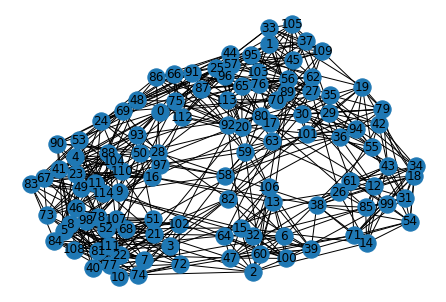

In [103]:
football_graph = nx.parse_gml(football_raw, label='id')
football_graph = nx.Graph(football_graph)
football_graph.remove_edges_from(football_graph.selfloop_edges())
football_igraph = ig.read(football_path)
football_igraph.simplify()


nx.draw(football_graph, with_labels=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='a

,algorithm,NMI,ARI,modularity
0,greedy_modularity,0.708066,0.474098,0.044365
1,louvain,0.590901,0.346011,0.604407
2,walktrap,0.600753,0.379390,0.039150


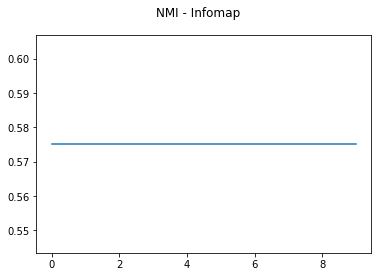

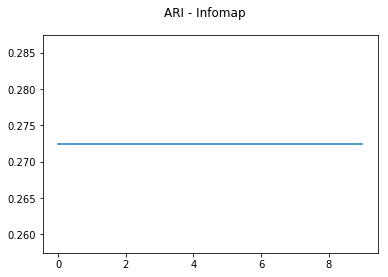

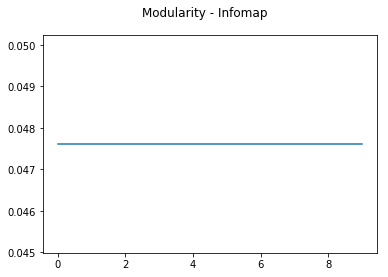

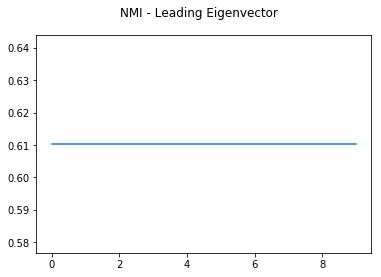

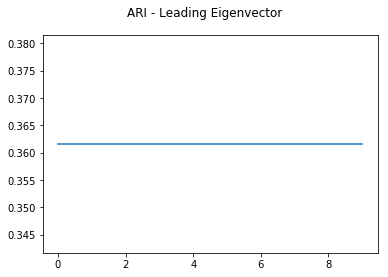

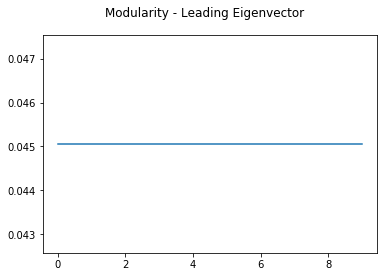

In [104]:
save_prefix = '/content/drive/My Drive/courses/network-science/assignments/a2/data/set1/football'
results = evaluate(football_graph, football_igraph, save_prefix)
results.to_csv('{}-results.csv'.format(save_prefix))
results

_Modularity detection_

In [0]:
communities = modularity_det(football_graph)

In [17]:
y_pred = []
y_true = []
for i, comm in enumerate(communities):
    print('{}th community:'.format(i))
    for comm_member in sorted(comm):
        true_info = football_info[comm_member]
        print(true_info)
        y_true.append(true_info['value'])
        y_pred.append(i)
    print('-------------------------------------')

0th community:
{'label': 'Auburn', 'value': 9}
{'label': 'Alabama', 'value': 9}
{'label': 'Florida', 'value': 9}
{'label': 'CentralFlorida', 'value': 5}
{'label': 'Connecticut', 'value': 5}
{'label': 'EastCarolina', 'value': 4}
{'label': 'Houston', 'value': 4}
{'label': 'Kentucky', 'value': 9}
{'label': 'Louisville', 'value': 4}
{'label': 'LouisianaTech', 'value': 11}
{'label': 'LouisianaMonroe', 'value': 10}
{'label': 'Vanderbilt', 'value': 9}
{'label': 'MiddleTennesseeState', 'value': 10}
{'label': 'MississippiState', 'value': 9}
{'label': 'Memphis', 'value': 4}
{'label': 'SouthCarolina', 'value': 9}
{'label': 'SouthernMississippi', 'value': 4}
{'label': 'Tennessee', 'value': 9}
{'label': 'Tulane', 'value': 4}
{'label': 'Mississippi', 'value': 9}
{'label': 'Army', 'value': 4}
{'label': 'Cincinnati', 'value': 4}
{'label': 'Georgia', 'value': 9}
{'label': 'LouisianaState', 'value': 9}
{'label': 'LouisianaLafayette', 'value': 10}
{'label': 'AlabamaBirmingham', 'value': 4}
{'label': 'Ark

In [18]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'football',
                                                    'NMI': nmi,
                                                    'algorithm': 'modularity',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098


_Louvain Algorithm_

In [19]:
partition = louvain_best_partition(football_graph)
louvain_comms = pd.DataFrame({'node': list(partition.keys()), 'community': list(partition.values())})
louvain_comms = louvain_comms.groupby(by='community')

y_true = []
y_pred = []

for i, comm in louvain_comms:
    print('{}th community:'.format(i))
    true_info = comm.node.apply(lambda cm: football_info[cm])
    print(true_info)
    y_true += [ti['value'] for ti in true_info]
    y_pred += [i] * len(comm)
    print('-------------------------------------')

0th community:
0         {'label': 'BrighamYoung', 'value': 7}
4            {'label': 'NewMexico', 'value': 7}
9        {'label': 'SanDiegoState', 'value': 7}
11         {'label': 'NorthTexas', 'value': 10}
16             {'label': 'Wyoming', 'value': 7}
23                {'label': 'Utah', 'value': 7}
24      {'label': 'ArkansasState', 'value': 10}
28         {'label': 'BoiseState', 'value': 11}
41       {'label': 'ColoradoState', 'value': 7}
50              {'label': 'Idaho', 'value': 10}
69     {'label': 'NewMexicoState', 'value': 10}
90           {'label': 'UtahState', 'value': 5}
93            {'label': 'AirForce', 'value': 7}
104     {'label': 'NevadaLasVegas', 'value': 7}
Name: node, dtype: object
-------------------------------------
1th community:
1            {'label': 'FloridaState', 'value': 0}
25     {'label': 'NorthCarolinaState', 'value': 0}
33               {'label': 'Virginia', 'value': 0}
37            {'label': 'GeorgiaTech', 'value': 0}
45                   {'label':

In [20]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'football',
                                                    'NMI': nmi,
                                                    'algorithm': 'louvain',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941


_Walktrap Algorithm_

In [50]:
clusters = walktrap_det(football_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(int(true_info['value']))
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 0.0, 'label': 'BrighamYoung', 'value': 7.0}
{'id': 4.0, 'label': 'NewMexico', 'value': 7.0}
{'id': 9.0, 'label': 'SanDiegoState', 'value': 7.0}
{'id': 11.0, 'label': 'NorthTexas', 'value': 10.0}
{'id': 16.0, 'label': 'Wyoming', 'value': 7.0}
{'id': 23.0, 'label': 'Utah', 'value': 7.0}
{'id': 24.0, 'label': 'ArkansasState', 'value': 10.0}
{'id': 28.0, 'label': 'BoiseState', 'value': 11.0}
{'id': 41.0, 'label': 'ColoradoState', 'value': 7.0}
{'id': 50.0, 'label': 'Idaho', 'value': 10.0}
{'id': 69.0, 'label': 'NewMexicoState', 'value': 10.0}
{'id': 90.0, 'label': 'UtahState', 'value': 5.0}
{'id': 93.0, 'label': 'AirForce', 'value': 7.0}
{'id': 104.0, 'label': 'NevadaLasVegas', 'value': 7.0}
-----------------------
community 1:
{'id': 1.0, 'label': 'FloridaState', 'value': 0.0}
{'id': 25.0, 'label': 'NorthCarolinaState', 'value': 0.0}
{'id': 33.0, 'label': 'Virginia', 'value': 0.0}
{'id': 37.0, 'label': 'GeorgiaTech', 'value': 0.0}
{'id': 45.0, 'label': 'Duke', 'value':

In [56]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
# real_classic_results = real_classic_results.append({'graph': 'football',
#                                                    'NMI': nmi,
#                                                    'algorithm': 'walktrap',
#                                                    'ARI': ari},
#                                                   ignore_index=True)
print(nmi, ari)
real_classic_results

0.8879161713775633 0.8154427010430405


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.906867,0.862824
4,football,comm_eigenvector,0.904419,0.851176


_Infomap Algorithm_

In [47]:
clusters = infomap_det(football_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(int(true_info['value']))
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 12.0, 'label': 'NorthernIllinois', 'value': 6.0}
{'id': 18.0, 'label': 'Akron', 'value': 6.0}
{'id': 26.0, 'label': 'BallState', 'value': 6.0}
{'id': 31.0, 'label': 'BowlingGreenState', 'value': 6.0}
{'id': 34.0, 'label': 'Buffalo', 'value': 6.0}
{'id': 36.0, 'label': 'CentralFlorida', 'value': 5.0}
{'id': 38.0, 'label': 'CentralMichigan', 'value': 6.0}
{'id': 42.0, 'label': 'Connecticut', 'value': 5.0}
{'id': 43.0, 'label': 'EasternMichigan', 'value': 6.0}
{'id': 54.0, 'label': 'Kent', 'value': 6.0}
{'id': 61.0, 'label': 'MiamiOhio', 'value': 6.0}
{'id': 71.0, 'label': 'Ohio', 'value': 6.0}
{'id': 85.0, 'label': 'Toledo', 'value': 6.0}
{'id': 99.0, 'label': 'Marshall', 'value': 6.0}
-----------------------
community 1:
{'id': 2.0, 'label': 'Iowa', 'value': 2.0}
{'id': 6.0, 'label': 'PennState', 'value': 2.0}
{'id': 13.0, 'label': 'Northwestern', 'value': 2.0}
{'id': 14.0, 'label': 'WesternMichigan', 'value': 6.0}
{'id': 15.0, 'label': 'Wisconsin', 'value': 2.0}
{'i

In [48]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
# real_classic_results = real_classic_results.append({'graph': 'football',
#                                                     'NMI': nmi,
#                                                     'algorithm': 'infomax',
#                                                     'ARI': ari},
#                                                    ignore_index=True)
print(nmi, ari)
real_classic_results

0.9044187276811518 0.8511760140991145


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.906867,0.862824
4,football,comm_eigenvector,0.904419,0.851176


_Community Leading Eigenvector Algorithm_

In [39]:
clusters = comm_lead_eigenvec_det(football_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(int(true_info['value']))
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 12.0, 'label': 'NorthernIllinois', 'value': 6.0}
{'id': 18.0, 'label': 'Akron', 'value': 6.0}
{'id': 26.0, 'label': 'BallState', 'value': 6.0}
{'id': 31.0, 'label': 'BowlingGreenState', 'value': 6.0}
{'id': 34.0, 'label': 'Buffalo', 'value': 6.0}
{'id': 36.0, 'label': 'CentralFlorida', 'value': 5.0}
{'id': 38.0, 'label': 'CentralMichigan', 'value': 6.0}
{'id': 42.0, 'label': 'Connecticut', 'value': 5.0}
{'id': 43.0, 'label': 'EasternMichigan', 'value': 6.0}
{'id': 54.0, 'label': 'Kent', 'value': 6.0}
{'id': 61.0, 'label': 'MiamiOhio', 'value': 6.0}
{'id': 71.0, 'label': 'Ohio', 'value': 6.0}
{'id': 85.0, 'label': 'Toledo', 'value': 6.0}
{'id': 99.0, 'label': 'Marshall', 'value': 6.0}
-----------------------
community 1:
{'id': 2.0, 'label': 'Iowa', 'value': 2.0}
{'id': 6.0, 'label': 'PennState', 'value': 2.0}
{'id': 13.0, 'label': 'Northwestern', 'value': 2.0}
{'id': 14.0, 'label': 'WesternMichigan', 'value': 6.0}
{'id': 15.0, 'label': 'Wisconsin', 'value': 2.0}
{'i

In [40]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'football',
                                                    'NMI': nmi,
                                                    'algorithm': 'comm_eigenvector',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.906867,0.862824
4,football,comm_eigenvector,0.904419,0.851176


In [0]:
real_classic_results.to_csv('football-res-v0.csv')

### Karate Graph

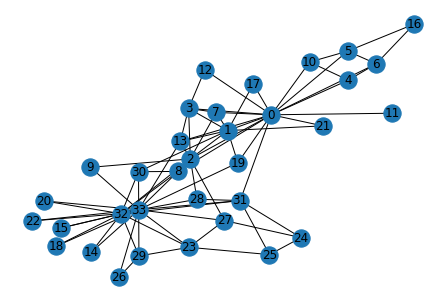

In [63]:
karate_graph = nx.karate_club_graph()
nx.write_graphml(karate_graph, 'karate_graph.graphml')
karate_igraph = ig.read('karate_graph.graphml', format='graphml')
karate_graph.remove_edges_from(karate_graph.selfloop_edges())
karate_igraph.simplify()

nx.draw(karate_graph, with_labels=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='a

,algorithm,NMI,ARI,modularity
0,greedy_modularity,0.576202,0.568439,0.166338
1,louvain,0.515641,0.392239,0.418803
2,walktrap,0.417849,0.262631,0.094510


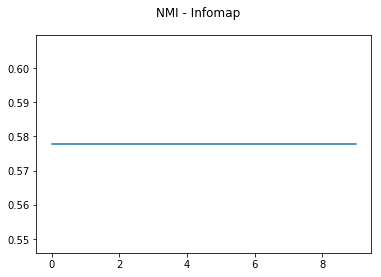

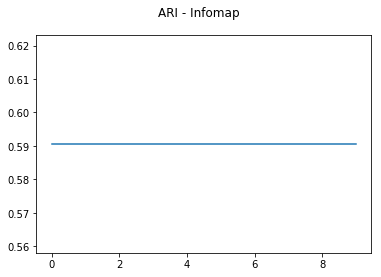

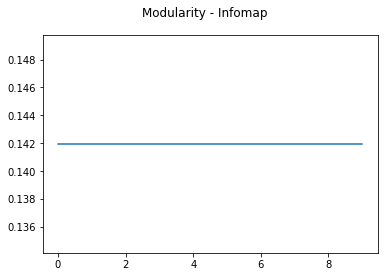

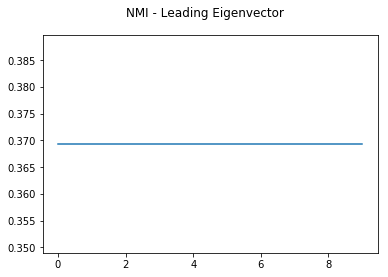

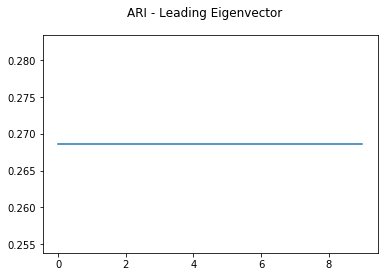

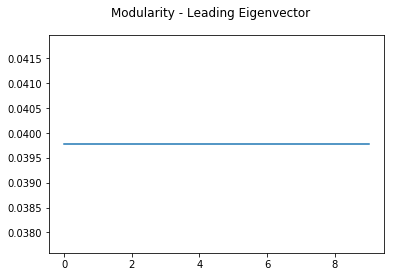

In [105]:
save_prefix = '/content/drive/My Drive/courses/network-science/assignments/a2/data/set1/karate'
results = evaluate(karate_graph, karate_igraph, save_prefix)
results.to_csv('{}-results.csv'.format(save_prefix))
results

_Modularity detection_

In [0]:
communities = modularity_det(karate_graph)

In [0]:
y_pred = []
y_true = []
for i, comm in enumerate(communities):
    print('{}th community:'.format(i))
    for comm_member in sorted(comm):
        true_info = karate_info[comm_member]
        print(true_info)
        y_true.append(true_info['club'])
        y_pred.append(i)
    print('-------------------------------------')

0th community:
{'club': 'Mr. Hi'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
-------------------------------------
1th community:
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Officer'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
-------------------------------------
2th community:
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
-------------------------------------


In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'karate',
                                                    'NMI': nmi,
                                                    'algorithm': 'modularity',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439


_Louvain Algorithm_

In [0]:
partition = louvain_best_partition(karate_graph)
louvain_comms = pd.DataFrame({'node': list(partition.keys()), 'community': list(partition.values())})
louvain_comms = louvain_comms.groupby(by='community')

y_true = []
y_pred = []

for i, comm in louvain_comms:
    print('{}th community:'.format(i))
    true_info = comm.node.apply(lambda cm: karate_info[cm])
    print(true_info)
    y_true += [ti['club'] for ti in true_info]
    y_pred += [i] * len(comm)
    print('-------------------------------------')

0th community:
0      {'club': 'Mr. Hi'}
1      {'club': 'Mr. Hi'}
2      {'club': 'Mr. Hi'}
3      {'club': 'Mr. Hi'}
7      {'club': 'Mr. Hi'}
9     {'club': 'Officer'}
11     {'club': 'Mr. Hi'}
12     {'club': 'Mr. Hi'}
13     {'club': 'Mr. Hi'}
17     {'club': 'Mr. Hi'}
19     {'club': 'Mr. Hi'}
21     {'club': 'Mr. Hi'}
Name: node, dtype: object
-------------------------------------
1th community:
4     {'club': 'Mr. Hi'}
5     {'club': 'Mr. Hi'}
6     {'club': 'Mr. Hi'}
10    {'club': 'Mr. Hi'}
16    {'club': 'Mr. Hi'}
Name: node, dtype: object
-------------------------------------
2th community:
8      {'club': 'Mr. Hi'}
14    {'club': 'Officer'}
15    {'club': 'Officer'}
18    {'club': 'Officer'}
20    {'club': 'Officer'}
22    {'club': 'Officer'}
23    {'club': 'Officer'}
26    {'club': 'Officer'}
27    {'club': 'Officer'}
29    {'club': 'Officer'}
30    {'club': 'Officer'}
32    {'club': 'Officer'}
33    {'club': 'Officer'}
Name: node, dtype: object
--------------------------

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'karate',
                                                    'NMI': nmi,
                                                    'algorithm': 'louvain',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439
6,karate,louvain,0.520595,0.429291


_Walktrap Algorithm_

In [0]:
clusters = walktrap_det(karate_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(true_info['club'])
        y_pred.append(i)
    print('-----------------------')

community 0:
{'club': 'Mr. Hi', 'id': '0'}
{'club': 'Mr. Hi', 'id': '1'}
{'club': 'Mr. Hi', 'id': '3'}
{'club': 'Mr. Hi', 'id': '7'}
{'club': 'Mr. Hi', 'id': '11'}
{'club': 'Mr. Hi', 'id': '12'}
{'club': 'Mr. Hi', 'id': '17'}
{'club': 'Mr. Hi', 'id': '19'}
{'club': 'Mr. Hi', 'id': '21'}
-----------------------
community 1:
{'club': 'Mr. Hi', 'id': '2'}
{'club': 'Mr. Hi', 'id': '8'}
{'club': 'Officer', 'id': '9'}
{'club': 'Mr. Hi', 'id': '13'}
{'club': 'Officer', 'id': '28'}
{'club': 'Officer', 'id': '30'}
{'club': 'Officer', 'id': '31'}
-----------------------
community 2:
{'club': 'Mr. Hi', 'id': '4'}
{'club': 'Mr. Hi', 'id': '5'}
{'club': 'Mr. Hi', 'id': '6'}
{'club': 'Mr. Hi', 'id': '10'}
{'club': 'Mr. Hi', 'id': '16'}
-----------------------
community 3:
{'club': 'Officer', 'id': '14'}
{'club': 'Officer', 'id': '15'}
{'club': 'Officer', 'id': '18'}
{'club': 'Officer', 'id': '20'}
{'club': 'Officer', 'id': '22'}
{'club': 'Officer', 'id': '26'}
{'club': 'Officer', 'id': '29'}
{'club'

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'karate',
                                                    'NMI': nmi,
                                                    'algorithm': 'walktrap',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439
6,karate,louvain,0.520595,0.429291
7,karate,walktrap,0.530905,0.320748


_Infomap Algorithm_

In [0]:
clusters = infomap_det(karate_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(true_info['club'])
        y_pred.append(i)
    print('-----------------------')

community 0:
{'club': 'Mr. Hi', 'id': '8'}
{'club': 'Officer', 'id': '14'}
{'club': 'Officer', 'id': '15'}
{'club': 'Officer', 'id': '18'}
{'club': 'Officer', 'id': '20'}
{'club': 'Officer', 'id': '22'}
{'club': 'Officer', 'id': '23'}
{'club': 'Officer', 'id': '24'}
{'club': 'Officer', 'id': '25'}
{'club': 'Officer', 'id': '26'}
{'club': 'Officer', 'id': '27'}
{'club': 'Officer', 'id': '28'}
{'club': 'Officer', 'id': '29'}
{'club': 'Officer', 'id': '30'}
{'club': 'Officer', 'id': '31'}
{'club': 'Officer', 'id': '32'}
{'club': 'Officer', 'id': '33'}
-----------------------
community 1:
{'club': 'Mr. Hi', 'id': '0'}
{'club': 'Mr. Hi', 'id': '1'}
{'club': 'Mr. Hi', 'id': '2'}
{'club': 'Mr. Hi', 'id': '3'}
{'club': 'Mr. Hi', 'id': '7'}
{'club': 'Officer', 'id': '9'}
{'club': 'Mr. Hi', 'id': '11'}
{'club': 'Mr. Hi', 'id': '12'}
{'club': 'Mr. Hi', 'id': '13'}
{'club': 'Mr. Hi', 'id': '17'}
{'club': 'Mr. Hi', 'id': '19'}
{'club': 'Mr. Hi', 'id': '21'}
-----------------------
community 2:
{'cl

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'karate',
                                                    'NMI': nmi,
                                                    'algorithm': 'infomax',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439
6,karate,louvain,0.520595,0.429291
7,karate,walktrap,0.530905,0.320748
8,karate,infomax,0.577744,0.590553


_Community Leading Eigenvector Algorithm_

In [0]:
clusters = comm_lead_eigenvec_det(karate_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(true_info['club'])
        y_pred.append(i)
    print('-----------------------')

community 0:
{'club': 'Mr. Hi', 'id': '8'}
{'club': 'Officer', 'id': '14'}
{'club': 'Officer', 'id': '15'}
{'club': 'Officer', 'id': '18'}
{'club': 'Officer', 'id': '20'}
{'club': 'Officer', 'id': '22'}
{'club': 'Officer', 'id': '23'}
{'club': 'Officer', 'id': '24'}
{'club': 'Officer', 'id': '25'}
{'club': 'Officer', 'id': '26'}
{'club': 'Officer', 'id': '27'}
{'club': 'Officer', 'id': '28'}
{'club': 'Officer', 'id': '29'}
{'club': 'Officer', 'id': '30'}
{'club': 'Officer', 'id': '31'}
{'club': 'Officer', 'id': '32'}
{'club': 'Officer', 'id': '33'}
-----------------------
community 1:
{'club': 'Mr. Hi', 'id': '0'}
{'club': 'Mr. Hi', 'id': '1'}
{'club': 'Mr. Hi', 'id': '2'}
{'club': 'Mr. Hi', 'id': '3'}
{'club': 'Mr. Hi', 'id': '7'}
{'club': 'Officer', 'id': '9'}
{'club': 'Mr. Hi', 'id': '11'}
{'club': 'Mr. Hi', 'id': '12'}
{'club': 'Mr. Hi', 'id': '13'}
{'club': 'Mr. Hi', 'id': '17'}
{'club': 'Mr. Hi', 'id': '19'}
{'club': 'Mr. Hi', 'id': '21'}
-----------------------
community 2:
{'cl

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'karate',
                                                    'NMI': nmi,
                                                    'algorithm': 'comm_eigenvector',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439
6,karate,louvain,0.520595,0.429291
7,karate,walktrap,0.530905,0.320748
8,karate,infomax,0.577744,0.590553
9,karate,comm_eigenvector,0.577744,0.590553


### Political blogosphere

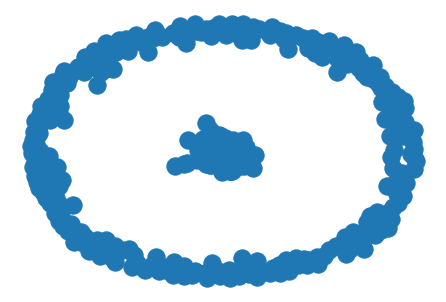

In [71]:
polblogs_path = '/content/drive/My Drive/courses/network-science/assignments/a2/data/set1/real-classic/polblogs.gml'
with codecs.open(polblogs_path, 'r') as f:
    polblogs_raw = f.readlines()

polblogs_raw[2] = 'multigraph 1\n'
polblogs_graph = nx.parse_gml(polblogs_raw, label='id')
polblogs_graph = nx.Graph(polblogs_graph)
polblogs_igraph = ig.read(polblogs_path)
polblogs_graph.remove_edges_from(polblogs_graph.selfloop_edges())
polblogs_igraph.simplify()

nx.draw(polblogs_graph, with_labels=False)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='a

,algorithm,NMI,ARI,modularity
0,greedy_modularity,0.442890,0.528486,0.175399
1,louvain,0.318569,0.351543,0.426792
2,walktrap,0.349765,0.401922,0.127870


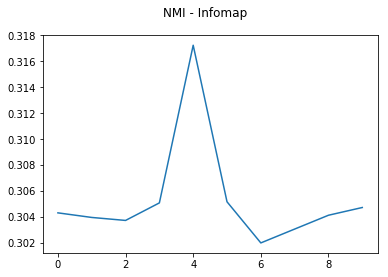

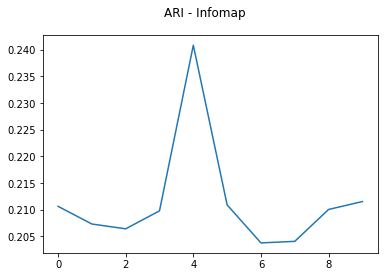

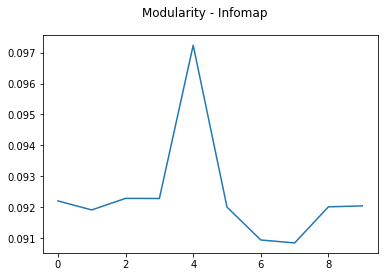

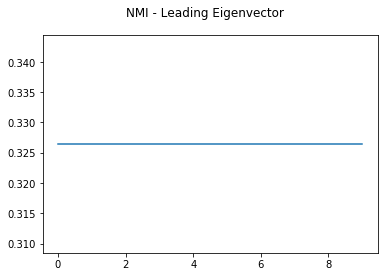

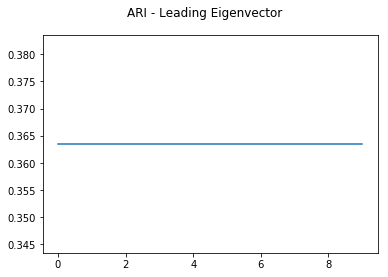

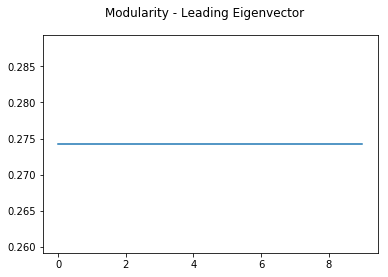

In [106]:
save_prefix = '/content/drive/My Drive/courses/network-science/assignments/a2/data/set1/polblogs'
results = evaluate(polblogs_graph, polblogs_igraph, save_prefix)
results.to_csv('{}-results.csv'.format(save_prefix))
results

_Modularity detection_

In [0]:
communities = modularity_det(polblogs_graph)

In [0]:
y_pred = []
y_true = []
for i, comm in enumerate(communities):
    print('{}th community:'.format(i))
    for comm_member in sorted(comm):
        true_info = polblogs_info[comm_member]
        print(true_info)
        y_true.append(true_info['value'])
        y_pred.append(i)
    print('-------------------------------------')

0th community:
{'label': '750volts.blogspot.com', 'value': 0, 'source': 'Blogarama'}
{'label': 'adamtalib.blogspot.com', 'value': 0, 'source': 'Blogarama'}
{'label': 'buzzmachine.com', 'value': 0, 'source': 'BlogPulse,LeftyDirectory'}
{'label': 'clarified.blogspot.com', 'value': 0, 'source': 'LeftyDirectory,eTalkingHead'}
{'label': 'elderbearden.blogspot.com', 'value': 0, 'source': 'Blogarama'}
{'label': 'estropundit.blogspot.com', 'value': 0, 'source': 'eTalkingHead'}
{'label': 'fuckthisblog.blogspot.com', 'value': 0, 'source': 'Blogarama'}
{'label': 'ibe.blogspot.com', 'value': 0, 'source': 'Blogarama,BlogCatalog'}
{'label': 'iwantmycountryback.org', 'value': 0, 'source': 'eTalkingHead,CampaignLine'}
{'label': 'jimtreacher.com', 'value': 0, 'source': 'LeftyDirectory'}
{'label': 'julietterossant.com/superchefblog/superchefblog.html', 'value': 0, 'source': 'eTalkingHead'}
{'label': 'justmark.com', 'value': 0, 'source': 'Blogarama'}
{'label': 'lawdork.blogspot.com', 'value': 0, 'source'

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'polblogs',
                                                    'NMI': nmi,
                                                    'algorithm': 'modularity',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439
6,karate,louvain,0.520595,0.429291
7,karate,walktrap,0.530905,0.320748
8,karate,infomax,0.577744,0.590553
9,karate,comm_eigenvector,0.577744,0.590553


_Louvain Algorithm_

In [0]:
partition = louvain_best_partition(polblogs_graph)
louvain_comms = pd.DataFrame({'node': list(partition.keys()), 'community': list(partition.values())})
louvain_comms = louvain_comms.groupby(by='community')

y_true = []
y_pred = []

for i, comm in louvain_comms:
    print('{}th community:'.format(i))
    true_info = comm.node.apply(lambda cm: polblogs_info[cm])
    print(true_info)
    y_true += [ti['value'] for ti in true_info]
    y_pred += [i] * len(comm)
    print('-------------------------------------')

0th community:
0       {'label': '100monkeystyping.com', 'value': 0, ...
1       {'label': '12thharmonic.com/wordpress', 'value...
5       {'label': '95theses.blogspot.com', 'value': 0,...
6       {'label': 'abbadabbaduo.blogspot.com', 'value'...
7       {'label': 'aboutpolitics.blogspot.com', 'value...
8       {'label': 'achingandspinning.blogspot.com', 'v...
9       {'label': 'ackackack.com', 'value': 0, 'source...
12      {'label': 'agonist.org', 'value': 0, 'source':...
13      {'label': 'aintnobaddude.com', 'value': 0, 'so...
14      {'label': 'ajbenjaminjr.blogspot.com', 'value'...
15      {'label': 'alicublog.blogspot.com', 'value': 0...
17      {'label': 'allspinzone.blogspot.com', 'value':...
19      {'label': 'alternateworlds.blogspot.com', 'val...
20      {'label': 'althippo.blogspot.com', 'value': 0,...
21      {'label': 'alvintostig.typepad.com', 'value': ...
22      {'label': 'americablog.blogspot.com', 'value':...
23      {'label': 'americablog.org', 'value': 0, 'sour...

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'polblogs',
                                                    'NMI': nmi,
                                                    'algorithm': 'louvain',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439
6,karate,louvain,0.520595,0.429291
7,karate,walktrap,0.530905,0.320748
8,karate,infomax,0.577744,0.590553
9,karate,comm_eigenvector,0.577744,0.590553


_Walktrap Algorithm_

In [0]:
clusters = walktrap_det(polblogs_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(int(true_info['value']))
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 1.0, 'label': '100monkeystyping.com', 'value': 0.0, 'source': 'Blogarama'}
{'id': 2.0, 'label': '12thharmonic.com/wordpress', 'value': 0.0, 'source': 'BlogCatalog'}
{'id': 6.0, 'label': '95theses.blogspot.com', 'value': 0.0, 'source': 'Blogarama'}
{'id': 7.0, 'label': 'abbadabbaduo.blogspot.com', 'value': 0.0, 'source': 'Blogarama,LeftyDirectory'}
{'id': 8.0, 'label': 'aboutpolitics.blogspot.com', 'value': 0.0, 'source': 'Blogarama,eTalkingHead'}
{'id': 9.0, 'label': 'achingandspinning.blogspot.com', 'value': 0.0, 'source': 'Blogarama'}
{'id': 10.0, 'label': 'ackackack.com', 'value': 0.0, 'source': 'BlogCatalog'}
{'id': 12.0, 'label': 'adviceforlefty.blogspot.com', 'value': 0.0, 'source': 'Blogarama,BlogCatalog,CampaignLine'}
{'id': 13.0, 'label': 'agonist.org', 'value': 0.0, 'source': 'LeftyDirectory'}
{'id': 14.0, 'label': 'aintnobaddude.com', 'value': 0.0, 'source': 'LeftyDirectory,CampaignLine'}
{'id': 15.0, 'label': 'ajbenjaminjr.blogspot.com', 'value': 0.0, 's

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'polblogs',
                                                    'NMI': nmi,
                                                    'algorithm': 'walktrap',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439
6,karate,louvain,0.520595,0.429291
7,karate,walktrap,0.530905,0.320748
8,karate,infomax,0.577744,0.590553
9,karate,comm_eigenvector,0.577744,0.590553


_Infomap Algorithm_

In [0]:
clusters = infomap_det(polblogs_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(int(true_info['value']))
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 1.0, 'label': '100monkeystyping.com', 'value': 0.0, 'source': 'Blogarama'}
{'id': 2.0, 'label': '12thharmonic.com/wordpress', 'value': 0.0, 'source': 'BlogCatalog'}
{'id': 7.0, 'label': 'abbadabbaduo.blogspot.com', 'value': 0.0, 'source': 'Blogarama,LeftyDirectory'}
{'id': 8.0, 'label': 'aboutpolitics.blogspot.com', 'value': 0.0, 'source': 'Blogarama,eTalkingHead'}
{'id': 9.0, 'label': 'achingandspinning.blogspot.com', 'value': 0.0, 'source': 'Blogarama'}
{'id': 13.0, 'label': 'agonist.org', 'value': 0.0, 'source': 'LeftyDirectory'}
{'id': 16.0, 'label': 'alicublog.blogspot.com', 'value': 0.0, 'source': 'LeftyDirectory'}
{'id': 17.0, 'label': 'allanjenkins.typepad.com', 'value': 0.0, 'source': 'BlogCatalog'}
{'id': 19.0, 'label': 'alphapredator.com/wdtgw.htm', 'value': 0.0, 'source': 'Blogarama'}
{'id': 20.0, 'label': 'alternateworlds.blogspot.com', 'value': 0.0, 'source': 'Blogarama'}
{'id': 30.0, 'label': 'amliberal.com/blog', 'value': 0.0, 'source': 'Blogarama,Bl

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'polblogs',
                                                    'NMI': nmi,
                                                    'algorithm': 'infomax',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439
6,karate,louvain,0.520595,0.429291
7,karate,walktrap,0.530905,0.320748
8,karate,infomax,0.577744,0.590553
9,karate,comm_eigenvector,0.577744,0.590553


_Community Leading Eigenvector Algorithm_

In [0]:
clusters = comm_lead_eigenvec_det(polblogs_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(int(true_info['value']))
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 1.0, 'label': '100monkeystyping.com', 'value': 0.0, 'source': 'Blogarama'}
{'id': 2.0, 'label': '12thharmonic.com/wordpress', 'value': 0.0, 'source': 'BlogCatalog'}
{'id': 7.0, 'label': 'abbadabbaduo.blogspot.com', 'value': 0.0, 'source': 'Blogarama,LeftyDirectory'}
{'id': 9.0, 'label': 'achingandspinning.blogspot.com', 'value': 0.0, 'source': 'Blogarama'}
{'id': 11.0, 'label': 'adamtalib.blogspot.com', 'value': 0.0, 'source': 'Blogarama'}
{'id': 15.0, 'label': 'ajbenjaminjr.blogspot.com', 'value': 0.0, 'source': 'LabeledManually'}
{'id': 17.0, 'label': 'allanjenkins.typepad.com', 'value': 0.0, 'source': 'BlogCatalog'}
{'id': 18.0, 'label': 'allspinzone.blogspot.com', 'value': 0.0, 'source': 'Blogarama'}
{'id': 19.0, 'label': 'alphapredator.com/wdtgw.htm', 'value': 0.0, 'source': 'Blogarama'}
{'id': 20.0, 'label': 'alternateworlds.blogspot.com', 'value': 0.0, 'source': 'Blogarama'}
{'id': 23.0, 'label': 'americablog.blogspot.com', 'value': 0.0, 'source': 'LabeledMan

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'polblogs',
                                                    'NMI': nmi,
                                                    'algorithm': 'comm_eigenvector',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439
6,karate,louvain,0.520595,0.429291
7,karate,walktrap,0.530905,0.320748
8,karate,infomax,0.577744,0.590553
9,karate,comm_eigenvector,0.577744,0.590553


### Political books

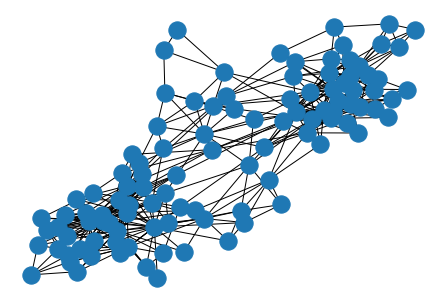

In [74]:
polbooks_path = '/content/drive/My Drive/courses/network-science/assignments/a2/data/set1/real-classic/polbooks.gml'
polbooks_graph = nx.read_gml(polbooks_path, label='id')
polbooks_graph = nx.Graph(polbooks_graph)
polbooks_igraph = ig.read(polbooks_path)
polbooks_graph.remove_edges_from(polbooks_graph.selfloop_edges())
polbooks_igraph.simplify()

nx.draw(polbooks_graph, with_labels=False)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='a

,algorithm,NMI,ARI,modularity
0,greedy_modularity,0.531353,0.637897,0.323181
1,louvain,0.470426,0.572419,0.526967
2,walktrap,0.368801,0.481297,0.291296


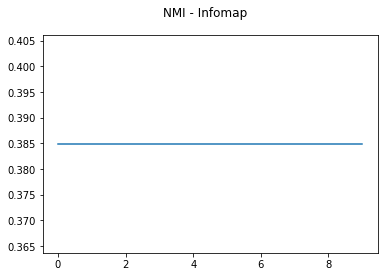

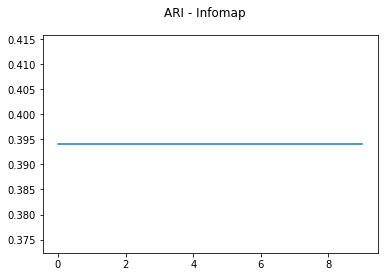

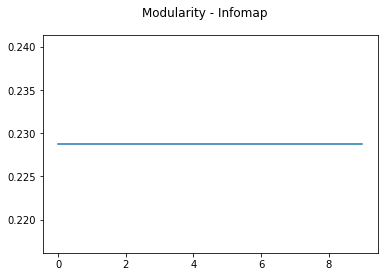

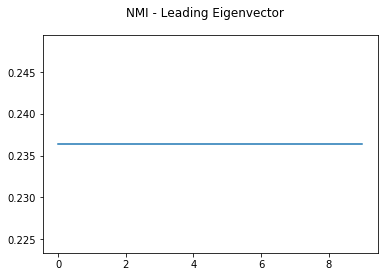

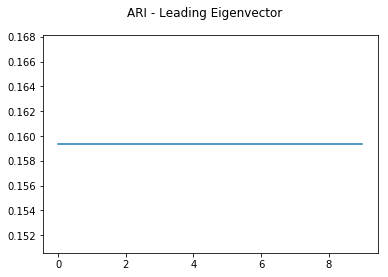

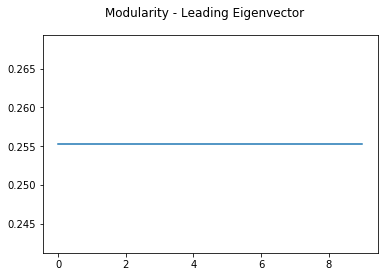

In [107]:
save_prefix = '/content/drive/My Drive/courses/network-science/assignments/a2/data/set1/polbooks'
results = evaluate(polbooks_graph, polbooks_igraph, save_prefix)
results.to_csv('{}-results.csv'.format(save_prefix))
results

_Modularity detection_

In [0]:
communities = modularity_det(polbooks_graph)

In [0]:
y_pred = []
y_true = []
for i, comm in enumerate(communities):
    print('{}th community:'.format(i))
    for comm_member in sorted(comm):
        true_info = polbooks_info[comm_member]
        print(true_info)
        y_true.append(true_info['value'])
        y_pred.append(i)
    print('-------------------------------------')

0th community:
{'label': '1000 Years for Revenge', 'value': 'n'}
{'label': 'Bush vs. the Beltway', 'value': 'c'}
{'label': "Charlie Wilson's War", 'value': 'c'}
{'label': 'Losing Bin Laden', 'value': 'c'}
{'label': 'Sleeping With the Devil', 'value': 'n'}
{'label': 'The Man Who Warned America', 'value': 'c'}
{'label': 'Why America Slept', 'value': 'n'}
{'label': 'Ghost Wars', 'value': 'n'}
{'label': 'A National Party No More', 'value': 'c'}
{'label': 'Bush Country', 'value': 'c'}
{'label': 'Dereliction of Duty', 'value': 'c'}
{'label': 'Legacy', 'value': 'c'}
{'label': 'Off with Their Heads', 'value': 'c'}
{'label': 'Persecution', 'value': 'c'}
{'label': "Rumsfeld's War", 'value': 'c'}
{'label': 'Breakdown', 'value': 'c'}
{'label': 'Betrayal', 'value': 'c'}
{'label': 'Shut Up and Sing', 'value': 'c'}
{'label': 'Meant To Be', 'value': 'n'}
{'label': 'The Right Man', 'value': 'c'}
{'label': 'Ten Minutes from Normal', 'value': 'c'}
{'label': "Hillary's Scheme", 'value': 'c'}
{'label': 'Th

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'polbooks',
                                                    'NMI': nmi,
                                                    'algorithm': 'modularity',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439
6,karate,louvain,0.520595,0.429291
7,karate,walktrap,0.530905,0.320748
8,karate,infomax,0.577744,0.590553
9,karate,comm_eigenvector,0.577744,0.590553


_Louvain Algorithm_

In [0]:
partition = louvain_best_partition(polbooks_graph)
louvain_comms = pd.DataFrame({'node': list(partition.keys()), 'community': list(partition.values())})
louvain_comms = louvain_comms.groupby(by='community')

y_true = []
y_pred = []

for i, comm in louvain_comms:
    print('{}th community:'.format(i))
    true_info = comm.node.apply(lambda cm: polbooks_info[cm])
    print(true_info)
    y_true += [ti['value'] for ti in true_info]
    y_pred += [i] * len(comm)
    print('-------------------------------------')

0th community:
0     {'label': '1000 Years for Revenge', 'value': 'n'}
1       {'label': 'Bush vs. the Beltway', 'value': 'c'}
2       {'label': 'Charlie Wilson's War', 'value': 'c'}
4     {'label': 'Sleeping With the Devil', 'value': ...
5     {'label': 'The Man Who Warned America', 'value...
6          {'label': 'Why America Slept', 'value': 'n'}
7                 {'label': 'Ghost Wars', 'value': 'n'}
18               {'label': 'Meant To Be', 'value': 'n'}
28        {'label': 'All the Shah's Men', 'value': 'n'}
29      {'label': 'Dangerous Dimplomacy', 'value': 'c'}
Name: node, dtype: object
-------------------------------------
1th community:
3           {'label': 'Losing Bin Laden', 'value': 'c'}
8     {'label': 'A National Party No More', 'value':...
9               {'label': 'Bush Country', 'value': 'c'}
10       {'label': 'Dereliction of Duty', 'value': 'c'}
11                    {'label': 'Legacy', 'value': 'c'}
12      {'label': 'Off with Their Heads', 'value': 'c'}
13        

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'polbooks',
                                                    'NMI': nmi,
                                                    'algorithm': 'louvain',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439
6,karate,louvain,0.520595,0.429291
7,karate,walktrap,0.530905,0.320748
8,karate,infomax,0.577744,0.590553
9,karate,comm_eigenvector,0.577744,0.590553


_Walktrap Algorithm_

In [0]:
clusters = walktrap_det(polbooks_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(true_info['value'])
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 0.0, 'label': '1000 Years for Revenge', 'value': 'n'}
{'id': 1.0, 'label': 'Bush vs. the Beltway', 'value': 'c'}
{'id': 2.0, 'label': "Charlie Wilson's War", 'value': 'c'}
{'id': 4.0, 'label': 'Sleeping With the Devil', 'value': 'n'}
{'id': 5.0, 'label': 'The Man Who Warned America', 'value': 'c'}
-----------------------
community 1:
{'id': 3.0, 'label': 'Losing Bin Laden', 'value': 'c'}
{'id': 6.0, 'label': 'Why America Slept', 'value': 'n'}
{'id': 7.0, 'label': 'Ghost Wars', 'value': 'n'}
{'id': 8.0, 'label': 'A National Party No More', 'value': 'c'}
{'id': 9.0, 'label': 'Bush Country', 'value': 'c'}
{'id': 10.0, 'label': 'Dereliction of Duty', 'value': 'c'}
{'id': 11.0, 'label': 'Legacy', 'value': 'c'}
{'id': 12.0, 'label': 'Off with Their Heads', 'value': 'c'}
{'id': 13.0, 'label': 'Persecution', 'value': 'c'}
{'id': 14.0, 'label': "Rumsfeld's War", 'value': 'c'}
{'id': 15.0, 'label': 'Breakdown', 'value': 'c'}
{'id': 16.0, 'label': 'Betrayal', 'value': 'c'}
{'i

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'polbooks',
                                                    'NMI': nmi,
                                                    'algorithm': 'walktrap',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439
6,karate,louvain,0.520595,0.429291
7,karate,walktrap,0.530905,0.320748
8,karate,infomax,0.577744,0.590553
9,karate,comm_eigenvector,0.577744,0.590553


_Infomap Algorithm_

In [0]:
clusters = infomap_det(polbooks_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(true_info['value'])
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 3.0, 'label': 'Losing Bin Laden', 'value': 'c'}
{'id': 8.0, 'label': 'A National Party No More', 'value': 'c'}
{'id': 9.0, 'label': 'Bush Country', 'value': 'c'}
{'id': 10.0, 'label': 'Dereliction of Duty', 'value': 'c'}
{'id': 11.0, 'label': 'Legacy', 'value': 'c'}
{'id': 12.0, 'label': 'Off with Their Heads', 'value': 'c'}
{'id': 13.0, 'label': 'Persecution', 'value': 'c'}
{'id': 14.0, 'label': "Rumsfeld's War", 'value': 'c'}
{'id': 15.0, 'label': 'Breakdown', 'value': 'c'}
{'id': 16.0, 'label': 'Betrayal', 'value': 'c'}
{'id': 17.0, 'label': 'Shut Up and Sing', 'value': 'c'}
{'id': 18.0, 'label': 'Meant To Be', 'value': 'n'}
{'id': 19.0, 'label': 'The Right Man', 'value': 'c'}
{'id': 20.0, 'label': 'Ten Minutes from Normal', 'value': 'c'}
{'id': 21.0, 'label': "Hillary's Scheme", 'value': 'c'}
{'id': 22.0, 'label': 'The French Betrayal of America', 'value': 'c'}
{'id': 23.0, 'label': 'Tales from the Left Coast', 'value': 'c'}
{'id': 24.0, 'label': 'Hating America

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'polbooks',
                                                    'NMI': nmi,
                                                    'algorithm': 'infomax',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439
6,karate,louvain,0.520595,0.429291
7,karate,walktrap,0.530905,0.320748
8,karate,infomax,0.577744,0.590553
9,karate,comm_eigenvector,0.577744,0.590553


_Community Leading Eigenvector Algorithm_

In [0]:
clusters = comm_lead_eigenvec_det(polbooks_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(true_info['value'])
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 3.0, 'label': 'Losing Bin Laden', 'value': 'c'}
{'id': 8.0, 'label': 'A National Party No More', 'value': 'c'}
{'id': 9.0, 'label': 'Bush Country', 'value': 'c'}
{'id': 10.0, 'label': 'Dereliction of Duty', 'value': 'c'}
{'id': 11.0, 'label': 'Legacy', 'value': 'c'}
{'id': 12.0, 'label': 'Off with Their Heads', 'value': 'c'}
{'id': 13.0, 'label': 'Persecution', 'value': 'c'}
{'id': 14.0, 'label': "Rumsfeld's War", 'value': 'c'}
{'id': 15.0, 'label': 'Breakdown', 'value': 'c'}
{'id': 16.0, 'label': 'Betrayal', 'value': 'c'}
{'id': 17.0, 'label': 'Shut Up and Sing', 'value': 'c'}
{'id': 18.0, 'label': 'Meant To Be', 'value': 'n'}
{'id': 19.0, 'label': 'The Right Man', 'value': 'c'}
{'id': 20.0, 'label': 'Ten Minutes from Normal', 'value': 'c'}
{'id': 21.0, 'label': "Hillary's Scheme", 'value': 'c'}
{'id': 22.0, 'label': 'The French Betrayal of America', 'value': 'c'}
{'id': 23.0, 'label': 'Tales from the Left Coast', 'value': 'c'}
{'id': 24.0, 'label': 'Hating America

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'polbooks',
                                                    'NMI': nmi,
                                                    'algorithm': 'comm_eigenvector',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439
6,karate,louvain,0.520595,0.429291
7,karate,walktrap,0.530905,0.320748
8,karate,infomax,0.577744,0.590553
9,karate,comm_eigenvector,0.577744,0.590553


### Strike graph

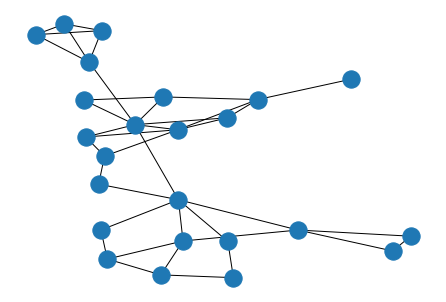

In [79]:
strike_path = '/content/drive/My Drive/courses/network-science/assignments/a2/data/set1/real-classic/strike.gml'
strike_graph = nx.read_gml(strike_path, label='id')
strike_graph = nx.Graph(strike_graph)
strike_igraph = ig.read(strike_path)
strike_graph.remove_edges_from(strike_graph.selfloop_edges())
strike_igraph.simplify()

nx.draw(strike_graph, with_labels=False)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='a

,algorithm,NMI,ARI,modularity
0,greedy_modularity,0.775300,0.664662,0.412396
1,louvain,0.601507,0.463459,0.555748
2,walktrap,0.689243,0.528176,0.561981


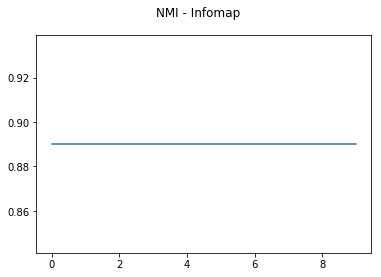

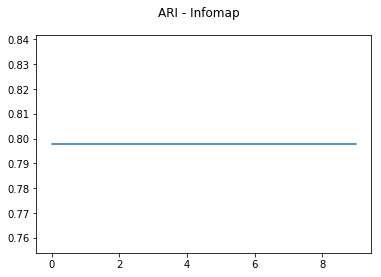

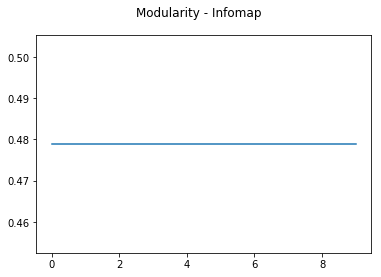

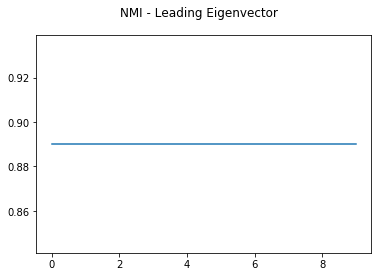

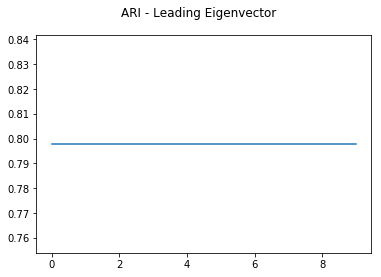

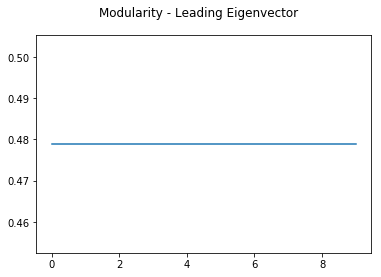

In [108]:
save_prefix = '/content/drive/My Drive/courses/network-science/assignments/a2/data/set1/strike'
results = evaluate(strike_graph, strike_igraph, save_prefix)
results.to_csv('{}-results.csv'.format(save_prefix))
results

_Modularity detection_

In [0]:
communities = modularity_det(strike_graph)

In [0]:
y_pred = []
y_true = []
for i, comm in enumerate(communities):
    print('{}th community:'.format(i))
    for comm_member in sorted(comm):
        true_info = strike_info[comm_member]
        print(true_info)
        y_true.append(true_info['value'])
        y_pred.append(i)
    print('-------------------------------------')

0th community:
{'label': '1', 'lang': 1, 'value': 1}
{'label': '2', 'lang': 1, 'value': 1}
{'label': '3', 'lang': 1, 'value': 1}
{'label': '4', 'lang': 1, 'value': 1}
{'label': '5', 'lang': 1, 'value': 1}
{'label': '6', 'lang': 1, 'value': 1}
{'label': '7', 'lang': 1, 'value': 1}
{'label': '8', 'lang': 1, 'value': 1}
{'label': '9', 'lang': 1, 'value': 1}
{'label': '15', 'lang': 3, 'value': 3}
-------------------------------------
1th community:
{'label': '14', 'lang': 3, 'value': 3}
{'label': '16', 'lang': 3, 'value': 3}
{'label': '17', 'lang': 3, 'value': 3}
{'label': '18', 'lang': 3, 'value': 3}
{'label': '19', 'lang': 3, 'value': 3}
{'label': '20', 'lang': 3, 'value': 3}
{'label': '21', 'lang': 3, 'value': 3}
-------------------------------------
2th community:
{'label': '10', 'lang': 2, 'value': 2}
{'label': '11', 'lang': 2, 'value': 2}
{'label': '12', 'lang': 2, 'value': 2}
{'label': '13', 'lang': 2, 'value': 2}
-------------------------------------
3th community:
{'label': '22', 

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'strike',
                                                    'NMI': nmi,
                                                    'algorithm': 'modularity',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439
6,karate,louvain,0.520595,0.429291
7,karate,walktrap,0.530905,0.320748
8,karate,infomax,0.577744,0.590553
9,karate,comm_eigenvector,0.577744,0.590553


_Louvain Algorithm_

In [0]:
partition = louvain_best_partition(strike_graph)
louvain_comms = pd.DataFrame({'node': list(partition.keys()), 'community': list(partition.values())})
louvain_comms = louvain_comms.groupby(by='community')

y_true = []
y_pred = []

for i, comm in louvain_comms:
    print('{}th community:'.format(i))
    true_info = comm.node.apply(lambda cm: strike_info[cm])
    print(true_info)
    y_true += [ti['value'] for ti in true_info]
    y_pred += [i] * len(comm)
    print('-------------------------------------')

0th community:
0      {'label': '1', 'lang': 1, 'value': 1}
1      {'label': '2', 'lang': 1, 'value': 1}
2      {'label': '3', 'lang': 1, 'value': 1}
3      {'label': '4', 'lang': 1, 'value': 1}
4      {'label': '5', 'lang': 1, 'value': 1}
5      {'label': '6', 'lang': 1, 'value': 1}
6      {'label': '7', 'lang': 1, 'value': 1}
7      {'label': '8', 'lang': 1, 'value': 1}
8      {'label': '9', 'lang': 1, 'value': 1}
14    {'label': '15', 'lang': 3, 'value': 3}
Name: node, dtype: object
-------------------------------------
1th community:
9     {'label': '10', 'lang': 2, 'value': 2}
10    {'label': '11', 'lang': 2, 'value': 2}
11    {'label': '12', 'lang': 2, 'value': 2}
12    {'label': '13', 'lang': 2, 'value': 2}
Name: node, dtype: object
-------------------------------------
2th community:
13    {'label': '14', 'lang': 3, 'value': 3}
15    {'label': '16', 'lang': 3, 'value': 3}
16    {'label': '17', 'lang': 3, 'value': 3}
17    {'label': '18', 'lang': 3, 'value': 3}
18    {'label': '

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'strike',
                                                    'NMI': nmi,
                                                    'algorithm': 'louvain',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439
6,karate,louvain,0.520595,0.429291
7,karate,walktrap,0.530905,0.320748
8,karate,infomax,0.577744,0.590553
9,karate,comm_eigenvector,0.577744,0.590553


_Walktrap Algorithm_

In [0]:
clusters = walktrap_det(strike_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(int(true_info['value']))
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 1.0, 'label': '1', 'lang': 1.0, 'value': 1.0}
{'id': 2.0, 'label': '2', 'lang': 1.0, 'value': 1.0}
{'id': 3.0, 'label': '3', 'lang': 1.0, 'value': 1.0}
{'id': 4.0, 'label': '4', 'lang': 1.0, 'value': 1.0}
{'id': 5.0, 'label': '5', 'lang': 1.0, 'value': 1.0}
{'id': 6.0, 'label': '6', 'lang': 1.0, 'value': 1.0}
{'id': 7.0, 'label': '7', 'lang': 1.0, 'value': 1.0}
{'id': 8.0, 'label': '8', 'lang': 1.0, 'value': 1.0}
{'id': 9.0, 'label': '9', 'lang': 1.0, 'value': 1.0}
-----------------------
community 1:
{'id': 10.0, 'label': '10', 'lang': 2.0, 'value': 2.0}
{'id': 11.0, 'label': '11', 'lang': 2.0, 'value': 2.0}
{'id': 12.0, 'label': '12', 'lang': 2.0, 'value': 2.0}
{'id': 13.0, 'label': '13', 'lang': 2.0, 'value': 2.0}
-----------------------
community 2:
{'id': 14.0, 'label': '14', 'lang': 3.0, 'value': 3.0}
{'id': 15.0, 'label': '15', 'lang': 3.0, 'value': 3.0}
{'id': 16.0, 'label': '16', 'lang': 3.0, 'value': 3.0}
{'id': 17.0, 'label': '17', 'lang': 3.0, 'value': 3

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'strike',
                                                    'NMI': nmi,
                                                    'algorithm': 'walktrap',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439
6,karate,louvain,0.520595,0.429291
7,karate,walktrap,0.530905,0.320748
8,karate,infomax,0.577744,0.590553
9,karate,comm_eigenvector,0.577744,0.590553


_Infomap Algorithm_

In [0]:
clusters = infomap_det(strike_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(int(true_info['value']))
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 1.0, 'label': '1', 'lang': 1.0, 'value': 1.0}
{'id': 2.0, 'label': '2', 'lang': 1.0, 'value': 1.0}
{'id': 3.0, 'label': '3', 'lang': 1.0, 'value': 1.0}
{'id': 4.0, 'label': '4', 'lang': 1.0, 'value': 1.0}
{'id': 5.0, 'label': '5', 'lang': 1.0, 'value': 1.0}
{'id': 6.0, 'label': '6', 'lang': 1.0, 'value': 1.0}
{'id': 7.0, 'label': '7', 'lang': 1.0, 'value': 1.0}
{'id': 8.0, 'label': '8', 'lang': 1.0, 'value': 1.0}
{'id': 9.0, 'label': '9', 'lang': 1.0, 'value': 1.0}
-----------------------
community 1:
{'id': 14.0, 'label': '14', 'lang': 3.0, 'value': 3.0}
{'id': 15.0, 'label': '15', 'lang': 3.0, 'value': 3.0}
{'id': 16.0, 'label': '16', 'lang': 3.0, 'value': 3.0}
{'id': 17.0, 'label': '17', 'lang': 3.0, 'value': 3.0}
{'id': 18.0, 'label': '18', 'lang': 3.0, 'value': 3.0}
{'id': 19.0, 'label': '19', 'lang': 3.0, 'value': 3.0}
{'id': 20.0, 'label': '20', 'lang': 3.0, 'value': 3.0}
{'id': 21.0, 'label': '21', 'lang': 3.0, 'value': 3.0}
-----------------------
community

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'strike',
                                                    'NMI': nmi,
                                                    'algorithm': 'infomax',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439
6,karate,louvain,0.520595,0.429291
7,karate,walktrap,0.530905,0.320748
8,karate,infomax,0.577744,0.590553
9,karate,comm_eigenvector,0.577744,0.590553


_Community Leading Eigenvector Algorithm_

In [0]:
clusters = comm_lead_eigenvec_det(strike_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(int(true_info['value']))
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 1.0, 'label': '1', 'lang': 1.0, 'value': 1.0}
{'id': 2.0, 'label': '2', 'lang': 1.0, 'value': 1.0}
{'id': 3.0, 'label': '3', 'lang': 1.0, 'value': 1.0}
{'id': 4.0, 'label': '4', 'lang': 1.0, 'value': 1.0}
{'id': 5.0, 'label': '5', 'lang': 1.0, 'value': 1.0}
{'id': 6.0, 'label': '6', 'lang': 1.0, 'value': 1.0}
{'id': 7.0, 'label': '7', 'lang': 1.0, 'value': 1.0}
{'id': 8.0, 'label': '8', 'lang': 1.0, 'value': 1.0}
{'id': 9.0, 'label': '9', 'lang': 1.0, 'value': 1.0}
-----------------------
community 1:
{'id': 14.0, 'label': '14', 'lang': 3.0, 'value': 3.0}
{'id': 15.0, 'label': '15', 'lang': 3.0, 'value': 3.0}
{'id': 16.0, 'label': '16', 'lang': 3.0, 'value': 3.0}
{'id': 17.0, 'label': '17', 'lang': 3.0, 'value': 3.0}
{'id': 18.0, 'label': '18', 'lang': 3.0, 'value': 3.0}
{'id': 19.0, 'label': '19', 'lang': 3.0, 'value': 3.0}
{'id': 20.0, 'label': '20', 'lang': 3.0, 'value': 3.0}
{'id': 21.0, 'label': '21', 'lang': 3.0, 'value': 3.0}
-----------------------
community

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'strike',
                                                    'NMI': nmi,
                                                    'algorithm': 'comm_eigenvector',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112
5,karate,modularity,0.576202,0.568439
6,karate,louvain,0.520595,0.429291
7,karate,walktrap,0.530905,0.320748
8,karate,infomax,0.577744,0.590553
9,karate,comm_eigenvector,0.577744,0.590553


In [0]:
real_classic_results.to_csv('real-classic-res-v0.csv')

## Real-Node-Label

In [0]:
!cp /content/drive/My\ Drive/courses/network-science/assignments/a2/data/set2/gcn/utils.py .

In [0]:
import os
import sys
import pickle as pkl
import numpy as np
import scipy.sparse as sp

from utils import parse_index_file, sample_mask

In [0]:
def load_data(dataset_str,
              data_path='/content/drive/My Drive/courses/network-science/assignments/a2/data/set2/gcn/data'):
    """
    Loads input data from gcn/data directory
    ind.dataset_str.x => the feature vectors of the training instances as scipy.sparse.csr.csr_matrix object;
    ind.dataset_str.tx => the feature vectors of the test instances as scipy.sparse.csr.csr_matrix object;
    ind.dataset_str.allx => the feature vectors of both labeled and unlabeled training instances
        (a superset of ind.dataset_str.x) as scipy.sparse.csr.csr_matrix object;
    ind.dataset_str.y => the one-hot labels of the labeled training instances as numpy.ndarray object;
    ind.dataset_str.ty => the one-hot labels of the test instances as numpy.ndarray object;
    ind.dataset_str.ally => the labels for instances in ind.dataset_str.allx as numpy.ndarray object;
    ind.dataset_str.graph => a dict in the format {index: [index_of_neighbor_nodes]} as collections.defaultdict
        object;
    ind.dataset_str.test.index => the indices of test instances in graph, for the inductive setting as list object.
    All objects above must be saved using python pickle module.
    :param dataset_str: Dataset name
    :return: All data input files loaded (as well the training/test data).
    Taken from https://github.com/tkipf/gcn/blob/master/gcn/utils.py#L24
    """
    names = ['x', 'y', 'tx', 'ty', 'allx', 'ally', 'graph']
    objects = []
    for i in range(len(names)):
        with open(os.path.join(data_path, "ind.{}.{}".format(dataset_str, names[i])), 'rb') as f:
            if sys.version_info > (3, 0):
                objects.append(pkl.load(f, encoding='latin1'))
            else:
                objects.append(pkl.load(f))

    x, y, tx, ty, allx, ally, graph = tuple(objects)
    test_idx_reorder = parse_index_file(os.path.join(data_path, "ind.{}.test.index".format(dataset_str)))
    test_idx_range = np.sort(test_idx_reorder)

    if dataset_str == 'citeseer':
        # Fix citeseer dataset (there are some isolated nodes in the graph)
        # Find isolated nodes, add them as zero-vecs into the right position
        test_idx_range_full = range(min(test_idx_reorder), max(test_idx_reorder)+1)
        tx_extended = sp.lil_matrix((len(test_idx_range_full), x.shape[1]))
        tx_extended[test_idx_range-min(test_idx_range), :] = tx
        tx = tx_extended
        ty_extended = np.zeros((len(test_idx_range_full), y.shape[1]))
        ty_extended[test_idx_range-min(test_idx_range), :] = ty
        ty = ty_extended

    features = sp.vstack((allx, tx)).tolil()
    features[test_idx_reorder, :] = features[test_idx_range, :]
    adj = nx.adjacency_matrix(nx.from_dict_of_lists(graph))

    labels = np.vstack((ally, ty))
    labels[test_idx_reorder, :] = labels[test_idx_range, :]
    
    return adj, labels

### Citeseer

In [0]:
citeseer_adj, citeseer_y_train = load_data('citeseer')
citeseer_adj = citeseer_adj.toarray()

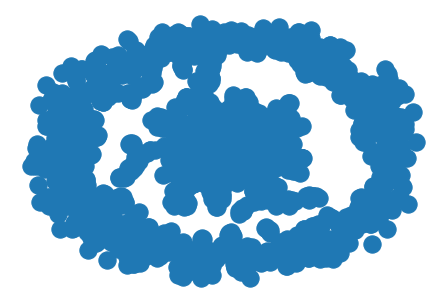

In [24]:
citeseer_graph = nx.from_numpy_matrix(citeseer_adj)
citeseer_igraph = ig.Graph.Adjacency((citeseer_adj > 0).tolist())
citeseer_graph.remove_edges_from(citeseer_graph.selfloop_edges())
citeseer_igraph.simplify()

nx.draw(citeseer_graph)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='a

,algorithm,NMI,ARI,modularity
0,greedy_modularity,0.140261,0.000521,0.016270
1,louvain,0.134861,0.000449,0.890266
2,walktrap,0.164226,0.000155,0.020058


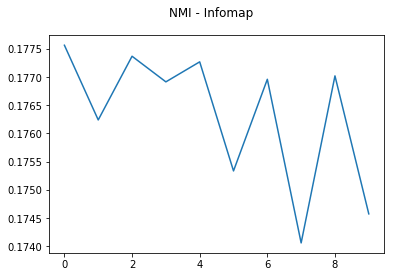

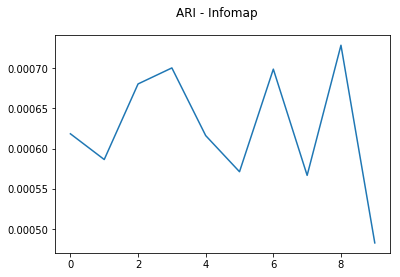

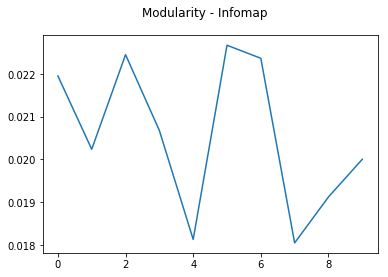

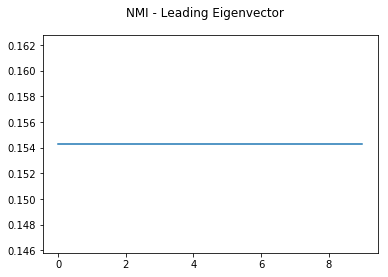

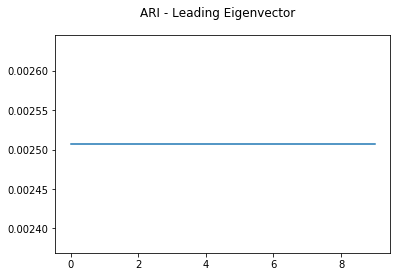

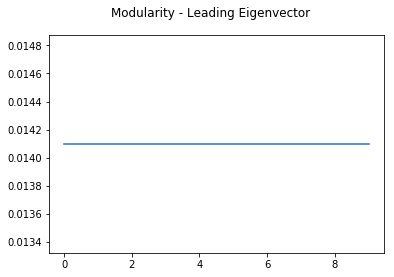

In [25]:
save_prefix = '/content/drive/My Drive/courses/network-science/assignments/a2/data/set2/results/citeseer'
results = evaluate(citeseer_graph, citeseer_igraph, save_prefix,
                   ytrue=citeseer_y_train.argmax(axis=1))
results.to_csv('{}-results.csv'.format(save_prefix))
results

_Modularity detection_

In [0]:
communities = modularity_det(citeseer_graph)

In [0]:
y_pred = []
y_true = citeseer_y_train.argmax(axis=1)
for i, comm in enumerate(communities):
    for comm_member in sorted(comm):
        true_info = citeseer_info[comm_member]
        y_pred.append(i)

In [0]:
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_node_results = real_node_results.append({'graph': 'citeseer',
                                                    'NMI': nmi,
                                                    'algorithm': 'modularity',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_node_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,citeseer,modularity,0.072703,-0.009184
1,citeseer,modularity,0.072703,-0.009184
2,citeseer,modularity,0.072703,-0.009184


_Louvain Algorithm_

In [0]:
partition = louvain_best_partition(football_graph)
louvain_comms = pd.DataFrame({'node': list(partition.keys()), 'community': list(partition.values())})
louvain_comms = louvain_comms.groupby(by='community')

y_true = []
y_pred = []

for i, comm in louvain_comms:
    print('{}th community:'.format(i))
    true_info = comm.node.apply(lambda cm: football_info[cm])
    print(true_info)
    y_true += [ti['value'] for ti in true_info]
    y_pred += [i] * len(comm)
    print('-------------------------------------')

0th community:
0         {'label': 'BrighamYoung', 'value': 7}
4            {'label': 'NewMexico', 'value': 7}
9        {'label': 'SanDiegoState', 'value': 7}
11         {'label': 'NorthTexas', 'value': 10}
16             {'label': 'Wyoming', 'value': 7}
23                {'label': 'Utah', 'value': 7}
24      {'label': 'ArkansasState', 'value': 10}
28         {'label': 'BoiseState', 'value': 11}
41       {'label': 'ColoradoState', 'value': 7}
50              {'label': 'Idaho', 'value': 10}
69     {'label': 'NewMexicoState', 'value': 10}
90           {'label': 'UtahState', 'value': 5}
93            {'label': 'AirForce', 'value': 7}
104     {'label': 'NevadaLasVegas', 'value': 7}
Name: node, dtype: object
-------------------------------------
1th community:
1            {'label': 'FloridaState', 'value': 0}
25     {'label': 'NorthCarolinaState', 'value': 0}
33               {'label': 'Virginia', 'value': 0}
37            {'label': 'GeorgiaTech', 'value': 0}
45                   {'label':

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'football',
                                                    'NMI': nmi,
                                                    'algorithm': 'louvain',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941


_Walktrap Algorithm_

In [0]:
clusters = walktrap_det(football_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(int(true_info['value']))
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 0.0, 'label': 'BrighamYoung', 'value': 7.0}
{'id': 4.0, 'label': 'NewMexico', 'value': 7.0}
{'id': 9.0, 'label': 'SanDiegoState', 'value': 7.0}
{'id': 11.0, 'label': 'NorthTexas', 'value': 10.0}
{'id': 16.0, 'label': 'Wyoming', 'value': 7.0}
{'id': 23.0, 'label': 'Utah', 'value': 7.0}
{'id': 24.0, 'label': 'ArkansasState', 'value': 10.0}
{'id': 28.0, 'label': 'BoiseState', 'value': 11.0}
{'id': 41.0, 'label': 'ColoradoState', 'value': 7.0}
{'id': 50.0, 'label': 'Idaho', 'value': 10.0}
{'id': 69.0, 'label': 'NewMexicoState', 'value': 10.0}
{'id': 90.0, 'label': 'UtahState', 'value': 5.0}
{'id': 93.0, 'label': 'AirForce', 'value': 7.0}
{'id': 104.0, 'label': 'NevadaLasVegas', 'value': 7.0}
-----------------------
community 1:
{'id': 1.0, 'label': 'FloridaState', 'value': 0.0}
{'id': 25.0, 'label': 'NorthCarolinaState', 'value': 0.0}
{'id': 33.0, 'label': 'Virginia', 'value': 0.0}
{'id': 37.0, 'label': 'GeorgiaTech', 'value': 0.0}
{'id': 45.0, 'label': 'Duke', 'value':

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'football',
                                                    'NMI': nmi,
                                                    'algorithm': 'walktrap',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443


_Infomap Algorithm_

In [0]:
clusters = infomap_det(football_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(int(true_info['value']))
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 12.0, 'label': 'NorthernIllinois', 'value': 6.0}
{'id': 18.0, 'label': 'Akron', 'value': 6.0}
{'id': 26.0, 'label': 'BallState', 'value': 6.0}
{'id': 31.0, 'label': 'BowlingGreenState', 'value': 6.0}
{'id': 34.0, 'label': 'Buffalo', 'value': 6.0}
{'id': 38.0, 'label': 'CentralMichigan', 'value': 6.0}
{'id': 42.0, 'label': 'Connecticut', 'value': 5.0}
{'id': 43.0, 'label': 'EasternMichigan', 'value': 6.0}
{'id': 54.0, 'label': 'Kent', 'value': 6.0}
{'id': 61.0, 'label': 'MiamiOhio', 'value': 6.0}
{'id': 71.0, 'label': 'Ohio', 'value': 6.0}
{'id': 85.0, 'label': 'Toledo', 'value': 6.0}
{'id': 99.0, 'label': 'Marshall', 'value': 6.0}
-----------------------
community 1:
{'id': 2.0, 'label': 'Iowa', 'value': 2.0}
{'id': 6.0, 'label': 'PennState', 'value': 2.0}
{'id': 13.0, 'label': 'Northwestern', 'value': 2.0}
{'id': 14.0, 'label': 'WesternMichigan', 'value': 6.0}
{'id': 15.0, 'label': 'Wisconsin', 'value': 2.0}
{'id': 32.0, 'label': 'Michigan', 'value': 2.0}
{'id': 39

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'football',
                                                    'NMI': nmi,
                                                    'algorithm': 'infomax',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731


_Community Leading Eigenvector Algorithm_

In [0]:
clusters = comm_lead_eigenvec_det(football_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(int(true_info['value']))
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 17.0, 'label': 'Auburn', 'value': 9.0}
{'id': 20.0, 'label': 'Alabama', 'value': 9.0}
{'id': 27.0, 'label': 'Florida', 'value': 9.0}
{'id': 56.0, 'label': 'Kentucky', 'value': 9.0}
{'id': 62.0, 'label': 'Vanderbilt', 'value': 9.0}
{'id': 65.0, 'label': 'MississippiState', 'value': 9.0}
{'id': 70.0, 'label': 'SouthCarolina', 'value': 9.0}
{'id': 76.0, 'label': 'Tennessee', 'value': 9.0}
{'id': 87.0, 'label': 'Mississippi', 'value': 9.0}
{'id': 95.0, 'label': 'Georgia', 'value': 9.0}
{'id': 96.0, 'label': 'LouisianaState', 'value': 9.0}
{'id': 113.0, 'label': 'Arkansas', 'value': 9.0}
-----------------------
community 1:
{'id': 2.0, 'label': 'Iowa', 'value': 2.0}
{'id': 6.0, 'label': 'PennState', 'value': 2.0}
{'id': 13.0, 'label': 'Northwestern', 'value': 2.0}
{'id': 15.0, 'label': 'Wisconsin', 'value': 2.0}
{'id': 32.0, 'label': 'Michigan', 'value': 2.0}
{'id': 39.0, 'label': 'Purdue', 'value': 2.0}
{'id': 47.0, 'label': 'OhioState', 'value': 2.0}
{'id': 60.0, 'labe

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'football',
                                                    'NMI': nmi,
                                                    'algorithm': 'comm_eigenvector',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112


In [0]:
real_classic_results.to_csv('football-res-v0.csv')

### Cora

In [0]:
cora_adj, cora_y_train = load_data('cora')
cora_adj = cora_adj.toarray()

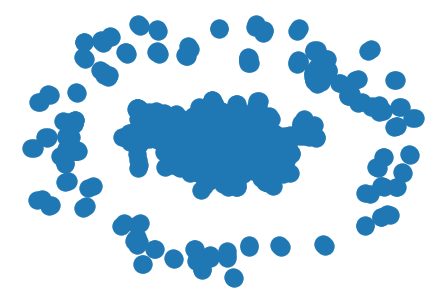

In [27]:
cora_graph = nx.from_numpy_matrix(cora_adj)
cora_igraph = ig.Graph.Adjacency((cora_adj > 0).tolist())
cora_graph.remove_edges_from(cora_graph.selfloop_edges())
cora_igraph.simplify()

nx.draw(cora_graph)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='a

,algorithm,NMI,ARI,modularity
0,greedy_modularity,0.069840,0.000455,0.049360
1,louvain,0.078339,0.005430,0.813801
2,walktrap,0.138304,0.002347,0.040870


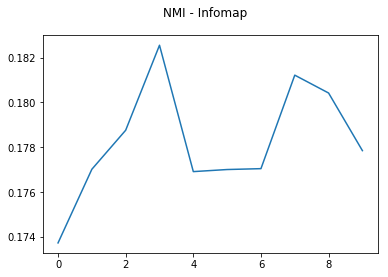

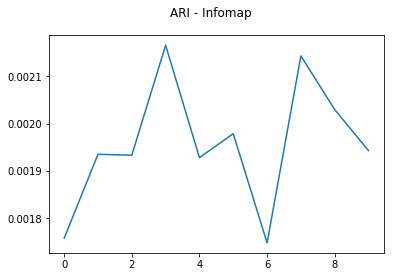

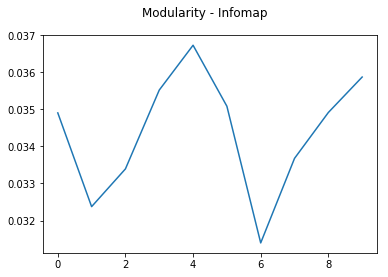

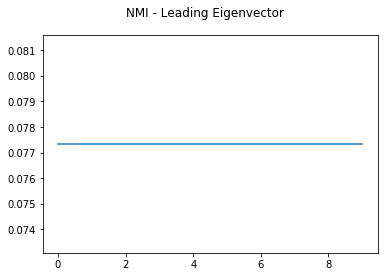

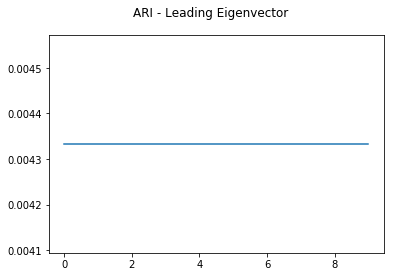

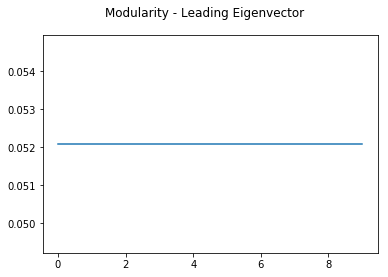

In [28]:
save_prefix = '/content/drive/My Drive/courses/network-science/assignments/a2/data/set2/results/cora'
results = evaluate(cora_graph, cora_igraph, save_prefix,
                   ytrue=cora_y_train.argmax(axis=1))
results.to_csv('{}-results.csv'.format(save_prefix))
results

_Modularity detection_

In [0]:
communities = modularity_det(football_graph)

In [0]:
y_pred = []
y_true = []
for i, comm in enumerate(communities):
    print('{}th community:'.format(i))
    for comm_member in sorted(comm):
        true_info = football_info[comm_member]
        print(true_info)
        y_true.append(true_info['value'])
        y_pred.append(i)
    print('-------------------------------------')

0th community:
{'label': 'Auburn', 'value': 9}
{'label': 'Alabama', 'value': 9}
{'label': 'Florida', 'value': 9}
{'label': 'CentralFlorida', 'value': 5}
{'label': 'Connecticut', 'value': 5}
{'label': 'EastCarolina', 'value': 4}
{'label': 'Houston', 'value': 4}
{'label': 'Kentucky', 'value': 9}
{'label': 'Louisville', 'value': 4}
{'label': 'LouisianaTech', 'value': 11}
{'label': 'LouisianaMonroe', 'value': 10}
{'label': 'Vanderbilt', 'value': 9}
{'label': 'MiddleTennesseeState', 'value': 10}
{'label': 'MississippiState', 'value': 9}
{'label': 'Memphis', 'value': 4}
{'label': 'SouthCarolina', 'value': 9}
{'label': 'SouthernMississippi', 'value': 4}
{'label': 'Tennessee', 'value': 9}
{'label': 'Tulane', 'value': 4}
{'label': 'Mississippi', 'value': 9}
{'label': 'Army', 'value': 4}
{'label': 'Cincinnati', 'value': 4}
{'label': 'Georgia', 'value': 9}
{'label': 'LouisianaState', 'value': 9}
{'label': 'LouisianaLafayette', 'value': 10}
{'label': 'AlabamaBirmingham', 'value': 4}
{'label': 'Ark

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'football',
                                                    'NMI': nmi,
                                                    'algorithm': 'modularity',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098


_Louvain Algorithm_

In [0]:
partition = louvain_best_partition(football_graph)
louvain_comms = pd.DataFrame({'node': list(partition.keys()), 'community': list(partition.values())})
louvain_comms = louvain_comms.groupby(by='community')

y_true = []
y_pred = []

for i, comm in louvain_comms:
    print('{}th community:'.format(i))
    true_info = comm.node.apply(lambda cm: football_info[cm])
    print(true_info)
    y_true += [ti['value'] for ti in true_info]
    y_pred += [i] * len(comm)
    print('-------------------------------------')

0th community:
0         {'label': 'BrighamYoung', 'value': 7}
4            {'label': 'NewMexico', 'value': 7}
9        {'label': 'SanDiegoState', 'value': 7}
11         {'label': 'NorthTexas', 'value': 10}
16             {'label': 'Wyoming', 'value': 7}
23                {'label': 'Utah', 'value': 7}
24      {'label': 'ArkansasState', 'value': 10}
28         {'label': 'BoiseState', 'value': 11}
41       {'label': 'ColoradoState', 'value': 7}
50              {'label': 'Idaho', 'value': 10}
69     {'label': 'NewMexicoState', 'value': 10}
90           {'label': 'UtahState', 'value': 5}
93            {'label': 'AirForce', 'value': 7}
104     {'label': 'NevadaLasVegas', 'value': 7}
Name: node, dtype: object
-------------------------------------
1th community:
1            {'label': 'FloridaState', 'value': 0}
25     {'label': 'NorthCarolinaState', 'value': 0}
33               {'label': 'Virginia', 'value': 0}
37            {'label': 'GeorgiaTech', 'value': 0}
45                   {'label':

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'football',
                                                    'NMI': nmi,
                                                    'algorithm': 'louvain',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941


_Walktrap Algorithm_

In [0]:
clusters = walktrap_det(football_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(int(true_info['value']))
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 0.0, 'label': 'BrighamYoung', 'value': 7.0}
{'id': 4.0, 'label': 'NewMexico', 'value': 7.0}
{'id': 9.0, 'label': 'SanDiegoState', 'value': 7.0}
{'id': 11.0, 'label': 'NorthTexas', 'value': 10.0}
{'id': 16.0, 'label': 'Wyoming', 'value': 7.0}
{'id': 23.0, 'label': 'Utah', 'value': 7.0}
{'id': 24.0, 'label': 'ArkansasState', 'value': 10.0}
{'id': 28.0, 'label': 'BoiseState', 'value': 11.0}
{'id': 41.0, 'label': 'ColoradoState', 'value': 7.0}
{'id': 50.0, 'label': 'Idaho', 'value': 10.0}
{'id': 69.0, 'label': 'NewMexicoState', 'value': 10.0}
{'id': 90.0, 'label': 'UtahState', 'value': 5.0}
{'id': 93.0, 'label': 'AirForce', 'value': 7.0}
{'id': 104.0, 'label': 'NevadaLasVegas', 'value': 7.0}
-----------------------
community 1:
{'id': 1.0, 'label': 'FloridaState', 'value': 0.0}
{'id': 25.0, 'label': 'NorthCarolinaState', 'value': 0.0}
{'id': 33.0, 'label': 'Virginia', 'value': 0.0}
{'id': 37.0, 'label': 'GeorgiaTech', 'value': 0.0}
{'id': 45.0, 'label': 'Duke', 'value':

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'football',
                                                    'NMI': nmi,
                                                    'algorithm': 'walktrap',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443


_Infomap Algorithm_

In [0]:
clusters = infomap_det(football_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(int(true_info['value']))
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 12.0, 'label': 'NorthernIllinois', 'value': 6.0}
{'id': 18.0, 'label': 'Akron', 'value': 6.0}
{'id': 26.0, 'label': 'BallState', 'value': 6.0}
{'id': 31.0, 'label': 'BowlingGreenState', 'value': 6.0}
{'id': 34.0, 'label': 'Buffalo', 'value': 6.0}
{'id': 38.0, 'label': 'CentralMichigan', 'value': 6.0}
{'id': 42.0, 'label': 'Connecticut', 'value': 5.0}
{'id': 43.0, 'label': 'EasternMichigan', 'value': 6.0}
{'id': 54.0, 'label': 'Kent', 'value': 6.0}
{'id': 61.0, 'label': 'MiamiOhio', 'value': 6.0}
{'id': 71.0, 'label': 'Ohio', 'value': 6.0}
{'id': 85.0, 'label': 'Toledo', 'value': 6.0}
{'id': 99.0, 'label': 'Marshall', 'value': 6.0}
-----------------------
community 1:
{'id': 2.0, 'label': 'Iowa', 'value': 2.0}
{'id': 6.0, 'label': 'PennState', 'value': 2.0}
{'id': 13.0, 'label': 'Northwestern', 'value': 2.0}
{'id': 14.0, 'label': 'WesternMichigan', 'value': 6.0}
{'id': 15.0, 'label': 'Wisconsin', 'value': 2.0}
{'id': 32.0, 'label': 'Michigan', 'value': 2.0}
{'id': 39

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'football',
                                                    'NMI': nmi,
                                                    'algorithm': 'infomax',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731


_Community Leading Eigenvector Algorithm_

In [0]:
clusters = comm_lead_eigenvec_det(football_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(int(true_info['value']))
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 17.0, 'label': 'Auburn', 'value': 9.0}
{'id': 20.0, 'label': 'Alabama', 'value': 9.0}
{'id': 27.0, 'label': 'Florida', 'value': 9.0}
{'id': 56.0, 'label': 'Kentucky', 'value': 9.0}
{'id': 62.0, 'label': 'Vanderbilt', 'value': 9.0}
{'id': 65.0, 'label': 'MississippiState', 'value': 9.0}
{'id': 70.0, 'label': 'SouthCarolina', 'value': 9.0}
{'id': 76.0, 'label': 'Tennessee', 'value': 9.0}
{'id': 87.0, 'label': 'Mississippi', 'value': 9.0}
{'id': 95.0, 'label': 'Georgia', 'value': 9.0}
{'id': 96.0, 'label': 'LouisianaState', 'value': 9.0}
{'id': 113.0, 'label': 'Arkansas', 'value': 9.0}
-----------------------
community 1:
{'id': 2.0, 'label': 'Iowa', 'value': 2.0}
{'id': 6.0, 'label': 'PennState', 'value': 2.0}
{'id': 13.0, 'label': 'Northwestern', 'value': 2.0}
{'id': 15.0, 'label': 'Wisconsin', 'value': 2.0}
{'id': 32.0, 'label': 'Michigan', 'value': 2.0}
{'id': 39.0, 'label': 'Purdue', 'value': 2.0}
{'id': 47.0, 'label': 'OhioState', 'value': 2.0}
{'id': 60.0, 'labe

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'football',
                                                    'NMI': nmi,
                                                    'algorithm': 'comm_eigenvector',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112


In [0]:
real_classic_results.to_csv('football-res-v0.csv')

### Pubmed

In [0]:
pubmed_adj, pubmed_y_train = load_data('pubmed')
pubmed_adj = pubmed_adj.toarray()

In [30]:
pubmed_adj.shape

(19717, 19717)

In [0]:
pubmed_graph = nx.from_numpy_matrix(pubmed_adj)
pubmed_igraph = ig.Graph.Adjacency((pubmed_adj > 0).tolist())

#nx.draw(pubmed_graph)
#plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='a

,algorithm,NMI,ARI,modularity
0,greedy_modularity,0.003397,0.000622,0.001706
1,louvain,0.001135,0.000212,0.768377
2,walktrap,0.021043,0.000242,0.000351


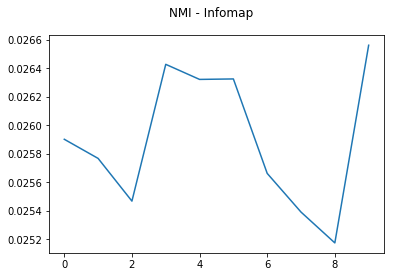

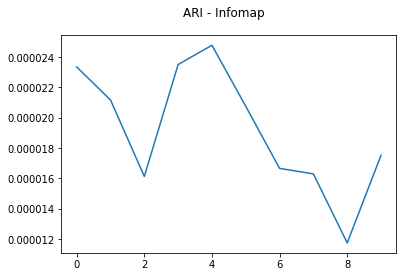

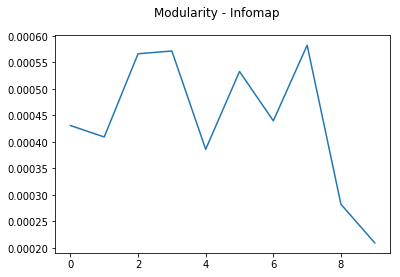

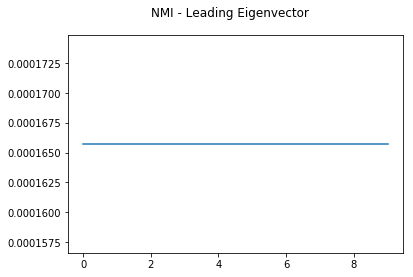

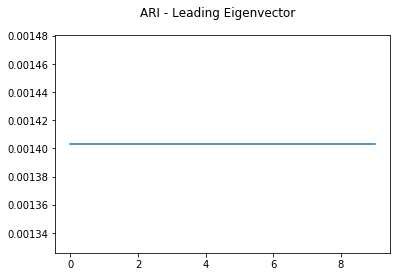

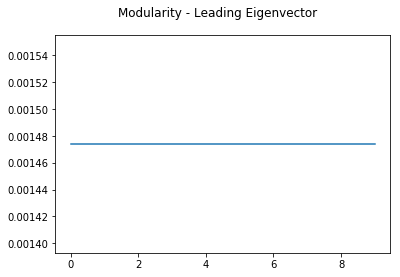

In [32]:
save_prefix = '/content/drive/My Drive/courses/network-science/assignments/a2/data/set2/results/pubmed'
results = evaluate(pubmed_graph, pubmed_igraph, save_prefix,
                   ytrue=pubmed_y_train.argmax(axis=1))
results.to_csv('{}-results.csv'.format(save_prefix))
results

In [0]:
pubmed_info = pubmed_graph.nodes(data=True)

_Modularity detection_

In [0]:
communities = modularity_det(football_graph)

In [0]:
y_pred = []
y_true = []
for i, comm in enumerate(communities):
    print('{}th community:'.format(i))
    for comm_member in sorted(comm):
        true_info = football_info[comm_member]
        print(true_info)
        y_true.append(true_info['value'])
        y_pred.append(i)
    print('-------------------------------------')

0th community:
{'label': 'Auburn', 'value': 9}
{'label': 'Alabama', 'value': 9}
{'label': 'Florida', 'value': 9}
{'label': 'CentralFlorida', 'value': 5}
{'label': 'Connecticut', 'value': 5}
{'label': 'EastCarolina', 'value': 4}
{'label': 'Houston', 'value': 4}
{'label': 'Kentucky', 'value': 9}
{'label': 'Louisville', 'value': 4}
{'label': 'LouisianaTech', 'value': 11}
{'label': 'LouisianaMonroe', 'value': 10}
{'label': 'Vanderbilt', 'value': 9}
{'label': 'MiddleTennesseeState', 'value': 10}
{'label': 'MississippiState', 'value': 9}
{'label': 'Memphis', 'value': 4}
{'label': 'SouthCarolina', 'value': 9}
{'label': 'SouthernMississippi', 'value': 4}
{'label': 'Tennessee', 'value': 9}
{'label': 'Tulane', 'value': 4}
{'label': 'Mississippi', 'value': 9}
{'label': 'Army', 'value': 4}
{'label': 'Cincinnati', 'value': 4}
{'label': 'Georgia', 'value': 9}
{'label': 'LouisianaState', 'value': 9}
{'label': 'LouisianaLafayette', 'value': 10}
{'label': 'AlabamaBirmingham', 'value': 4}
{'label': 'Ark

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'football',
                                                    'NMI': nmi,
                                                    'algorithm': 'modularity',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098


_Louvain Algorithm_

In [0]:
partition = louvain_best_partition(football_graph)
louvain_comms = pd.DataFrame({'node': list(partition.keys()), 'community': list(partition.values())})
louvain_comms = louvain_comms.groupby(by='community')

y_true = []
y_pred = []

for i, comm in louvain_comms:
    print('{}th community:'.format(i))
    true_info = comm.node.apply(lambda cm: football_info[cm])
    print(true_info)
    y_true += [ti['value'] for ti in true_info]
    y_pred += [i] * len(comm)
    print('-------------------------------------')

0th community:
0         {'label': 'BrighamYoung', 'value': 7}
4            {'label': 'NewMexico', 'value': 7}
9        {'label': 'SanDiegoState', 'value': 7}
11         {'label': 'NorthTexas', 'value': 10}
16             {'label': 'Wyoming', 'value': 7}
23                {'label': 'Utah', 'value': 7}
24      {'label': 'ArkansasState', 'value': 10}
28         {'label': 'BoiseState', 'value': 11}
41       {'label': 'ColoradoState', 'value': 7}
50              {'label': 'Idaho', 'value': 10}
69     {'label': 'NewMexicoState', 'value': 10}
90           {'label': 'UtahState', 'value': 5}
93            {'label': 'AirForce', 'value': 7}
104     {'label': 'NevadaLasVegas', 'value': 7}
Name: node, dtype: object
-------------------------------------
1th community:
1            {'label': 'FloridaState', 'value': 0}
25     {'label': 'NorthCarolinaState', 'value': 0}
33               {'label': 'Virginia', 'value': 0}
37            {'label': 'GeorgiaTech', 'value': 0}
45                   {'label':

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'football',
                                                    'NMI': nmi,
                                                    'algorithm': 'louvain',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941


_Walktrap Algorithm_

In [0]:
clusters = walktrap_det(football_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(int(true_info['value']))
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 0.0, 'label': 'BrighamYoung', 'value': 7.0}
{'id': 4.0, 'label': 'NewMexico', 'value': 7.0}
{'id': 9.0, 'label': 'SanDiegoState', 'value': 7.0}
{'id': 11.0, 'label': 'NorthTexas', 'value': 10.0}
{'id': 16.0, 'label': 'Wyoming', 'value': 7.0}
{'id': 23.0, 'label': 'Utah', 'value': 7.0}
{'id': 24.0, 'label': 'ArkansasState', 'value': 10.0}
{'id': 28.0, 'label': 'BoiseState', 'value': 11.0}
{'id': 41.0, 'label': 'ColoradoState', 'value': 7.0}
{'id': 50.0, 'label': 'Idaho', 'value': 10.0}
{'id': 69.0, 'label': 'NewMexicoState', 'value': 10.0}
{'id': 90.0, 'label': 'UtahState', 'value': 5.0}
{'id': 93.0, 'label': 'AirForce', 'value': 7.0}
{'id': 104.0, 'label': 'NevadaLasVegas', 'value': 7.0}
-----------------------
community 1:
{'id': 1.0, 'label': 'FloridaState', 'value': 0.0}
{'id': 25.0, 'label': 'NorthCarolinaState', 'value': 0.0}
{'id': 33.0, 'label': 'Virginia', 'value': 0.0}
{'id': 37.0, 'label': 'GeorgiaTech', 'value': 0.0}
{'id': 45.0, 'label': 'Duke', 'value':

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'football',
                                                    'NMI': nmi,
                                                    'algorithm': 'walktrap',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443


_Infomap Algorithm_

In [0]:
clusters = infomap_det(football_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(int(true_info['value']))
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 12.0, 'label': 'NorthernIllinois', 'value': 6.0}
{'id': 18.0, 'label': 'Akron', 'value': 6.0}
{'id': 26.0, 'label': 'BallState', 'value': 6.0}
{'id': 31.0, 'label': 'BowlingGreenState', 'value': 6.0}
{'id': 34.0, 'label': 'Buffalo', 'value': 6.0}
{'id': 38.0, 'label': 'CentralMichigan', 'value': 6.0}
{'id': 42.0, 'label': 'Connecticut', 'value': 5.0}
{'id': 43.0, 'label': 'EasternMichigan', 'value': 6.0}
{'id': 54.0, 'label': 'Kent', 'value': 6.0}
{'id': 61.0, 'label': 'MiamiOhio', 'value': 6.0}
{'id': 71.0, 'label': 'Ohio', 'value': 6.0}
{'id': 85.0, 'label': 'Toledo', 'value': 6.0}
{'id': 99.0, 'label': 'Marshall', 'value': 6.0}
-----------------------
community 1:
{'id': 2.0, 'label': 'Iowa', 'value': 2.0}
{'id': 6.0, 'label': 'PennState', 'value': 2.0}
{'id': 13.0, 'label': 'Northwestern', 'value': 2.0}
{'id': 14.0, 'label': 'WesternMichigan', 'value': 6.0}
{'id': 15.0, 'label': 'Wisconsin', 'value': 2.0}
{'id': 32.0, 'label': 'Michigan', 'value': 2.0}
{'id': 39

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'football',
                                                    'NMI': nmi,
                                                    'algorithm': 'infomax',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731


_Community Leading Eigenvector Algorithm_

In [0]:
clusters = comm_lead_eigenvec_det(football_igraph)
y_true = []
y_pred = []
for i, cluster in enumerate(clusters):
    print('community {}:'.format(i))
    for vertex in cluster.vs():
        true_info = vertex.attributes()
        print(true_info)
        y_true.append(int(true_info['value']))
        y_pred.append(i)
    print('-----------------------')

community 0:
{'id': 17.0, 'label': 'Auburn', 'value': 9.0}
{'id': 20.0, 'label': 'Alabama', 'value': 9.0}
{'id': 27.0, 'label': 'Florida', 'value': 9.0}
{'id': 56.0, 'label': 'Kentucky', 'value': 9.0}
{'id': 62.0, 'label': 'Vanderbilt', 'value': 9.0}
{'id': 65.0, 'label': 'MississippiState', 'value': 9.0}
{'id': 70.0, 'label': 'SouthCarolina', 'value': 9.0}
{'id': 76.0, 'label': 'Tennessee', 'value': 9.0}
{'id': 87.0, 'label': 'Mississippi', 'value': 9.0}
{'id': 95.0, 'label': 'Georgia', 'value': 9.0}
{'id': 96.0, 'label': 'LouisianaState', 'value': 9.0}
{'id': 113.0, 'label': 'Arkansas', 'value': 9.0}
-----------------------
community 1:
{'id': 2.0, 'label': 'Iowa', 'value': 2.0}
{'id': 6.0, 'label': 'PennState', 'value': 2.0}
{'id': 13.0, 'label': 'Northwestern', 'value': 2.0}
{'id': 15.0, 'label': 'Wisconsin', 'value': 2.0}
{'id': 32.0, 'label': 'Michigan', 'value': 2.0}
{'id': 39.0, 'label': 'Purdue', 'value': 2.0}
{'id': 47.0, 'label': 'OhioState', 'value': 2.0}
{'id': 60.0, 'labe

In [0]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
real_classic_results = real_classic_results.append({'graph': 'football',
                                                    'NMI': nmi,
                                                    'algorithm': 'comm_eigenvector',
                                                    'ARI': ari},
                                                   ignore_index=True)
real_classic_results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


,graph,algorithm,NMI,ARI
0,football,modularity,0.708066,0.474098
1,football,louvain,0.890939,0.806941
2,football,walktrap,0.887916,0.815443
3,football,infomax,0.900191,0.852731
4,football,comm_eigenvector,0.900678,0.836112


In [0]:
real_classic_results.to_csv('football-res-v0.csv')

## Synthetic

In [0]:
from networkx.algorithms.community.community_generators import LFR_benchmark_graph

In [0]:
#@title LFR Parameters
n = 1000 #@param {type:"slider", min:1, max:2000}
tau1 = 3 #@param {type:"slider", min:1.1, max:10, step:0.01}
tau2 = 1.5 #@param {type:"slider", min:1.1, max:10, step:0.01}
mu = 0.5 #@param {type:"slider", min:0, max:1, step:0.001}
average_degree = 5 #@param {type:"slider", min:0, max:143}
min_community=20 #@param {type:"integer"}

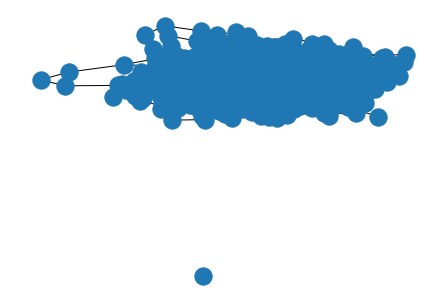

In [34]:
lfr_graph = LFR_benchmark_graph(n, tau1, tau2, mu,
                                average_degree=average_degree,
                                min_community=min_community)
#nx.write_graphml(lfr_graph, 'lfr_graph.graphml')
#lfr_graph = nx.read_gml('lfr_graph.graphml')
#lfr_igraph = ig.read('lfr_graph.graphml', format='graphml')
lfr_adj = nx.adjacency_matrix(lfr_graph).toarray()
lfr_igraph = ig.Graph.Adjacency((lfr_adj > 0).tolist())

nx.draw(lfr_graph)
plt.show()

In [30]:
lfr_graph.nodes(data=True)

NodeDataView({0: {'community': {0, 13, 156, 162, 179, 188, 60, 191, 63, 193, 195, 68, 197, 199, 200, 77, 205, 208, 81, 210, 89, 91, 95, 224, 227, 237, 114, 247, 248, 249, 124}}, 1: {'community': {1, 130, 131, 132, 3, 2, 7, 136, 11, 140, 142, 143, 144, 17, 18, 150, 159, 32, 181, 215, 90, 221, 96, 99, 100, 229, 115, 120, 125}}, 2: {'community': {1, 130, 131, 132, 3, 2, 7, 136, 11, 140, 142, 143, 144, 17, 18, 150, 159, 32, 181, 215, 90, 221, 96, 99, 100, 229, 115, 120, 125}}, 3: {'community': {1, 130, 131, 132, 3, 2, 7, 136, 11, 140, 142, 143, 144, 17, 18, 150, 159, 32, 181, 215, 90, 221, 96, 99, 100, 229, 115, 120, 125}}, 4: {'community': {129, 4, 5, 149, 25, 155, 28, 157, 29, 27, 161, 165, 166, 39, 170, 173, 175, 49, 50, 177, 186, 61, 65, 196, 70, 71, 72, 73, 212, 85, 214, 217, 102, 104, 244, 245, 127}}, 5: {'community': {129, 4, 5, 149, 25, 155, 28, 157, 29, 27, 161, 165, 166, 39, 170, 173, 175, 49, 50, 177, 186, 61, 65, 196, 70, 71, 72, 73, 212, 85, 214, 217, 102, 104, 244, 245, 127}}

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='a

InternalError: ignored

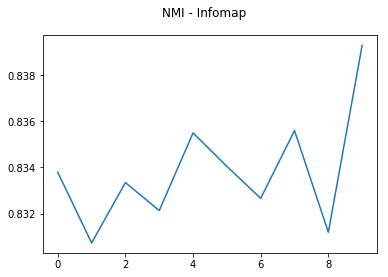

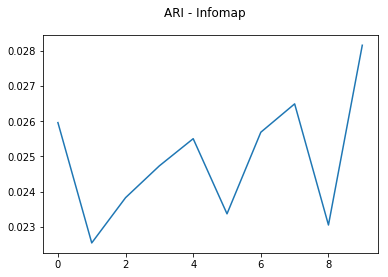

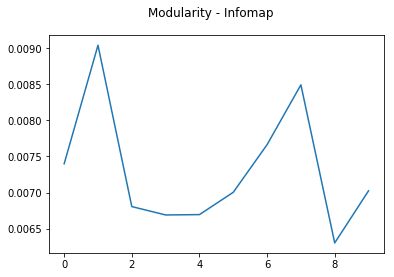

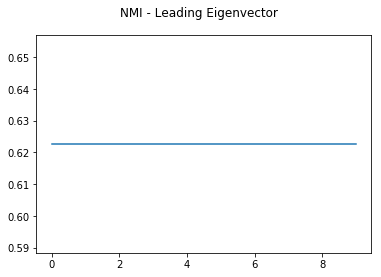

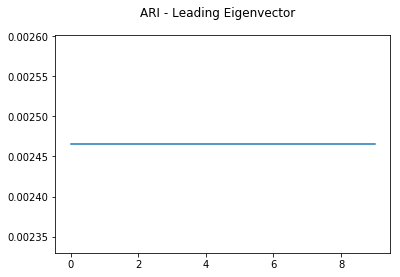

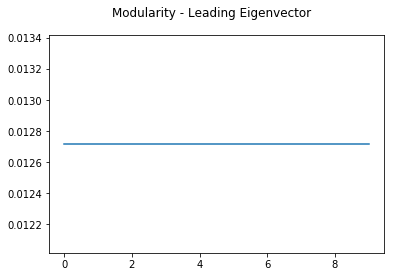

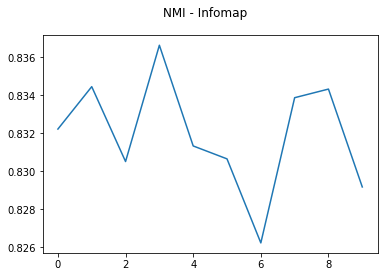

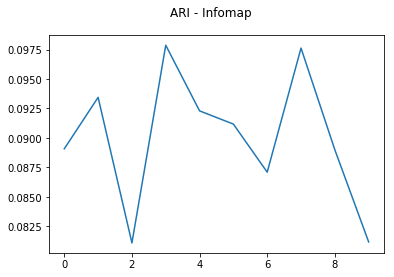

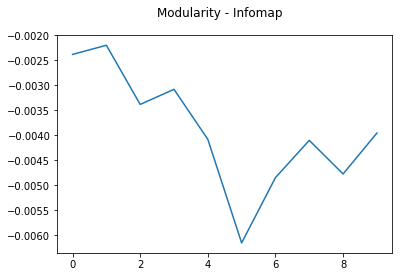

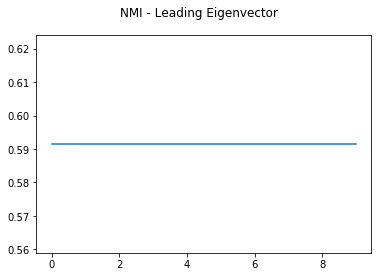

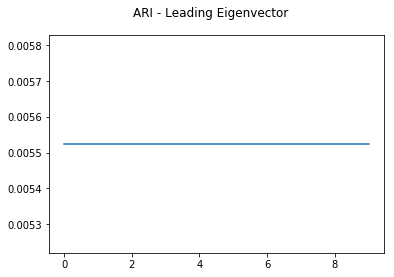

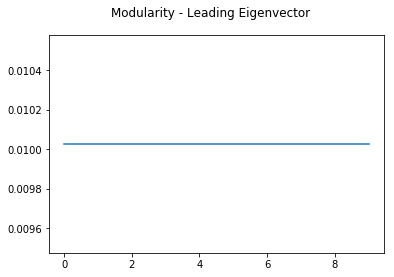

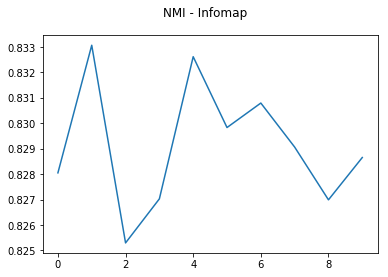

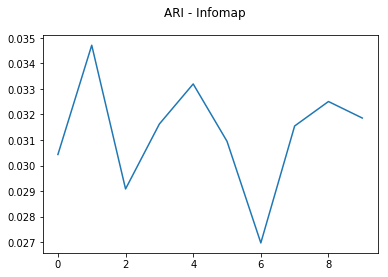

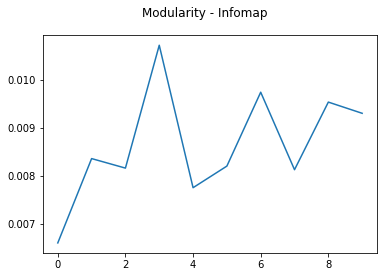

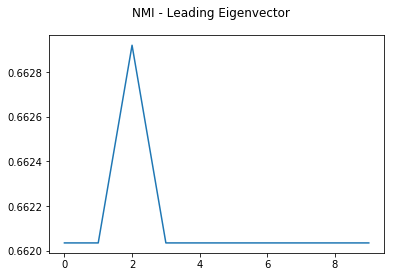

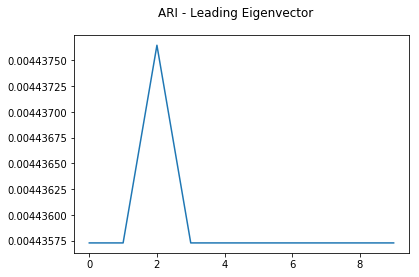

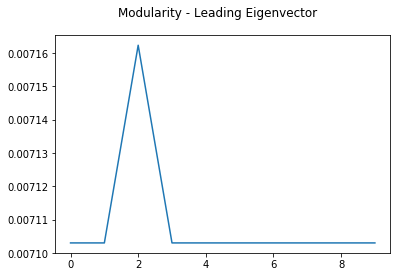

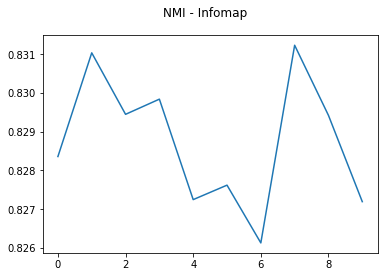

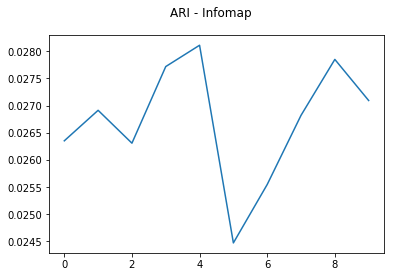

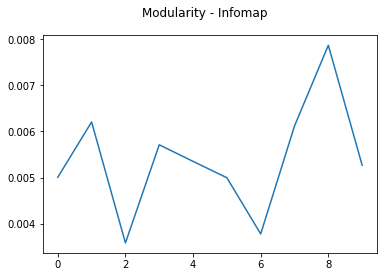

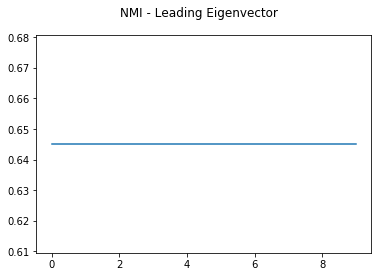

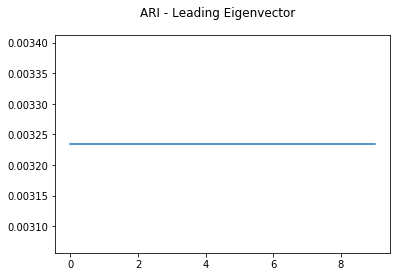

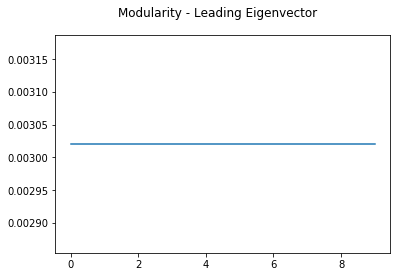

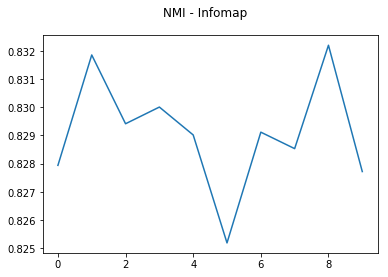

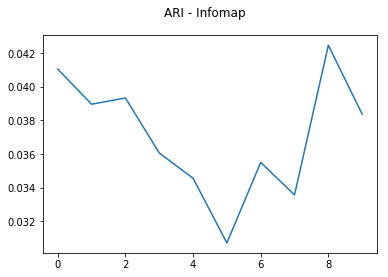

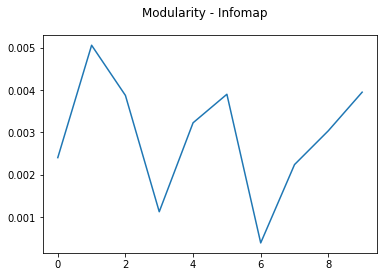

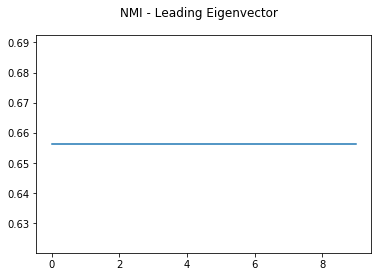

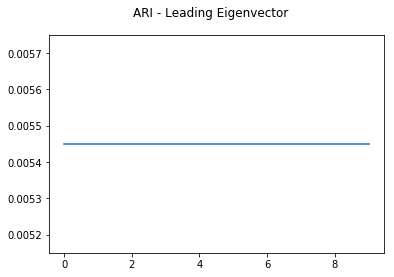

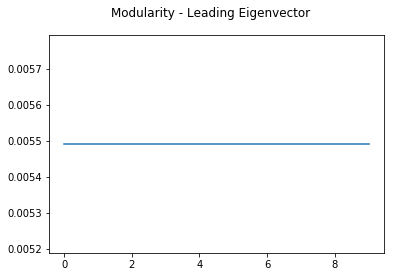

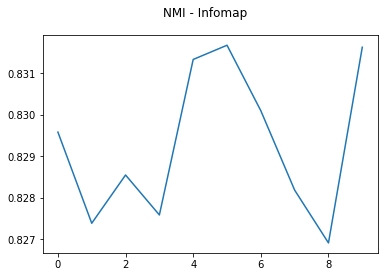

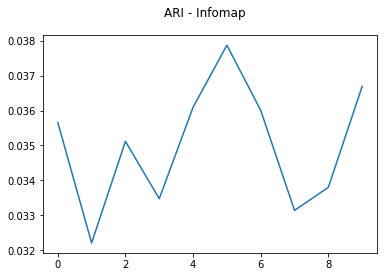

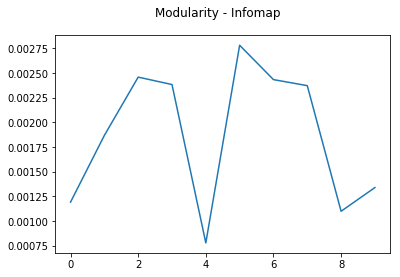

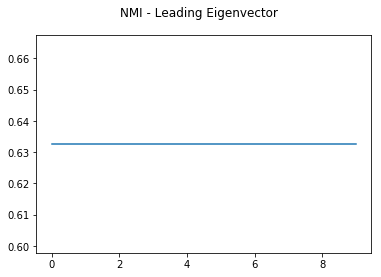

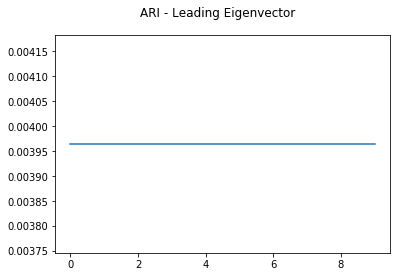

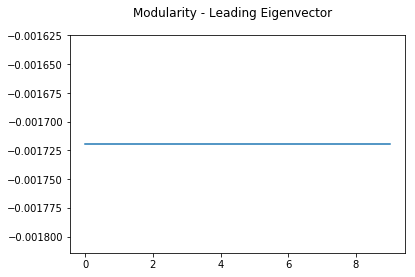

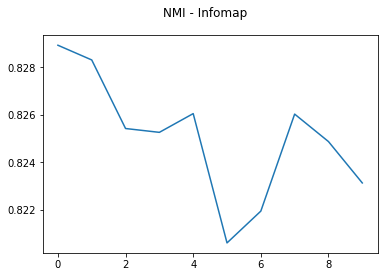

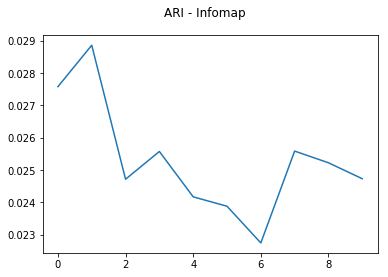

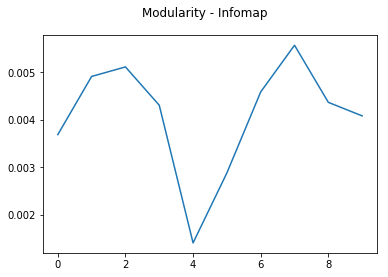

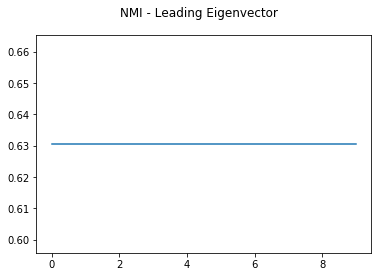

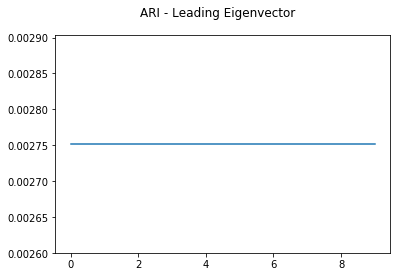

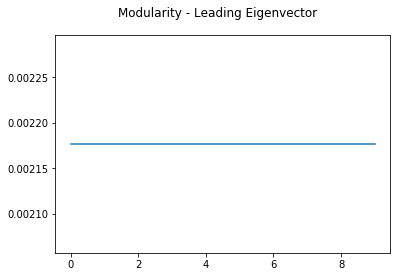

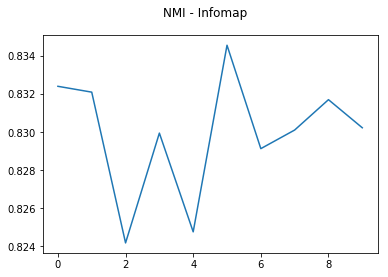

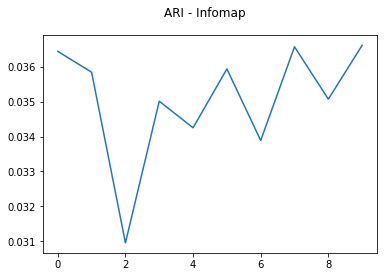

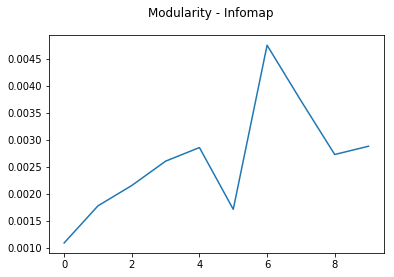

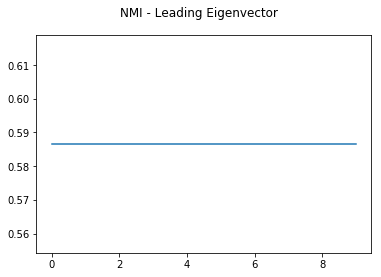

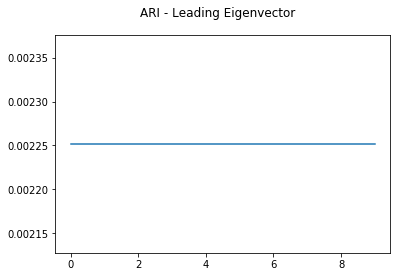

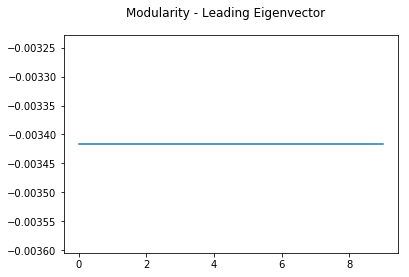

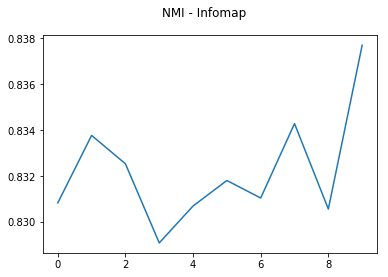

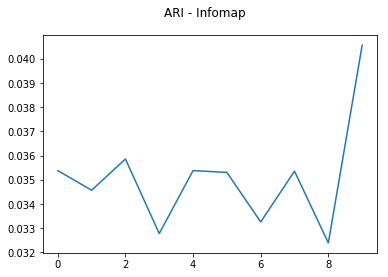

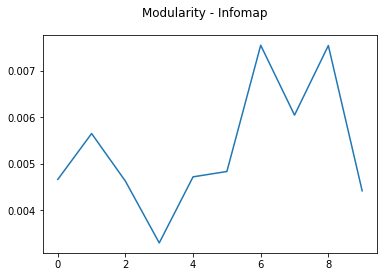

In [18]:
for i in range(10):
    lfr_graph = LFR_benchmark_graph(n, tau1, tau2, mu,
                                average_degree=average_degree,
                                min_community=min_community)
    lfr_adj = nx.adjacency_matrix(lfr_graph).toarray()
    lfr_igraph = ig.Graph.Adjacency((lfr_adj > 0).tolist())
    save_prefix = '/content/drive/My Drive/courses/network-science/assignments/a2/data/set3/lfr-{}'.format(i)
    results = evaluate(lfr_graph, lfr_igraph, save_prefix)
    results.to_csv('{}-results.csv'.format(save_prefix))